# QUESTION 1 : AMES HOUSES

**STUDENTS ID**

Kader SORO : 79366

Carla CATELAN : 79172

 Ndèye Arame MBENGUE : 87533
 
Elyazid BENKHADRA : 80574

In [1]:
##LIBRAIRIES IMPORTATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score
import HelpfulFunctions as hp

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import gaussian_kde
import seaborn as sns

In [2]:
warnings.filterwarnings('ignore')

# 1 - DATA IMPORT AND TREATMENT

In [3]:
df = pd.read_csv("AmesHousing.csv")

In [4]:
original_df = df.copy()

In [5]:
df

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2      NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3      NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4      NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2926   NaN       IR1          Low  ...         0     NaN  MnPrv          NaN   
2927   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2928   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
2       12500       6    2010       WD           Normal     172000  
3           0       4    2010       WD           Normal     244000  
4           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

In [6]:
df.shape

(2930, 82)

In [7]:
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [8]:
df.tail()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
2925   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2926   NaN       IR1          Low  ...         0     NaN  MnPrv          NaN   
2927   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2928   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[5 rows x 82 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [10]:
df.describe()

Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    179.112611   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1965.000000      0.000000   
50%        6.000000      5.000000  1973.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    164.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2930.000000    2930.000000     2930.000000  2930.000000   
mean   ...     93.751877      47.533447       23.011604     2.592491   
std    ...    126.361562      67.483400       64.139059    25.141331   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2930.000000  2930.000000   2930.000000  2930.000000  2930.000000   
mean      16.002048     2.243345     50.635154     6.216041  2007.790444   
std       56.087370    35.597181    566.344288     2.714492     1.316613   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2930.000000  
mean   180796.060068  
std     79886.692357  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213500.000000  
max    755000.000000  

[8 rows x 39 columns]

**DATAFRAME DESCRIPTION**  
The dataset contains 2,930 rows and 82 columns and is used to predict SalePrice, the target variable representing the final price of homes in Ames, Iowa. It includes a variety of features that describe the properties, including:  
    -Numeric Features: Lot dimensions (e.g., Lot Area, Lot Frontage), house characteristics (e.g., Overall Qual, Total Bsmt SF, Gr Liv Area), and sale information (e.g., Year Built, Yr Sold).  
    -Categorical Features: Zoning classification (MS Zoning), neighborhood, building type, house style, and various condition ratings (e.g., Exter Qual, Bsmt Qual).  
    -Key Features: Descriptions related to the house's physical condition, size, location, and amenities are likely influential in predicting the SalePrice.  
    -The dataset will require handling missing values, encoding categorical variables, and feature engineering to build a robust predictive model for housing prices.

# 1.1 - Missing Values : Dropping

In [11]:
#LIST OF FEATURES TO DROP
columns_to_drop=[]

In [12]:
#ADDING FEATURES TO DROP
columns_to_drop += ["Alley", "Mas Vnr Type", "Pool QC", "Misc Feature", "Fence", "Fireplace Qu"]

In [13]:
#NUMBER OF UNIQUE VALUES PER FEATURES
number_of_unique_values_per_columns = []
for column in list(df.columns):
    number_of_unique_values_per_columns.append({column :len(df[column].unique())})

number_of_unique_values_per_columns

[{'Order': 2930},
 {'PID': 2930},
 {'MS SubClass': 16},
 {'MS Zoning': 7},
 {'Lot Frontage': 129},
 {'Lot Area': 1960},
 {'Street': 2},
 {'Alley': 3},
 {'Lot Shape': 4},
 {'Land Contour': 4},
 {'Utilities': 3},
 {'Lot Config': 5},
 {'Land Slope': 3},
 {'Neighborhood': 28},
 {'Condition 1': 9},
 {'Condition 2': 8},
 {'Bldg Type': 5},
 {'House Style': 8},
 {'Overall Qual': 10},
 {'Overall Cond': 9},
 {'Year Built': 118},
 {'Year Remod/Add': 61},
 {'Roof Style': 6},
 {'Roof Matl': 8},
 {'Exterior 1st': 16},
 {'Exterior 2nd': 17},
 {'Mas Vnr Type': 5},
 {'Mas Vnr Area': 446},
 {'Exter Qual': 4},
 {'Exter Cond': 5},
 {'Foundation': 6},
 {'Bsmt Qual': 6},
 {'Bsmt Cond': 6},
 {'Bsmt Exposure': 5},
 {'BsmtFin Type 1': 7},
 {'BsmtFin SF 1': 996},
 {'BsmtFin Type 2': 7},
 {'BsmtFin SF 2': 275},
 {'Bsmt Unf SF': 1138},
 {'Total Bsmt SF': 1059},
 {'Heating': 6},
 {'Heating QC': 5},
 {'Central Air': 2},
 {'Electrical': 6},
 {'1st Flr SF': 1083},
 {'2nd Flr SF': 635},
 {'Low Qual Fin SF': 36},
 {'Gr

Too many values mean that the feature is irrelevant : Order and PID

In [14]:
#ADDING ORDER AND PID
columns_to_drop.append("Order")
columns_to_drop.append("PID")

In [15]:
#DROPPING FEATURES
df = df.drop(columns_to_drop, axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   object 
 2   Lot Frontage     2440 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   object 
 5   Lot Shape        2930 non-null   object 
 6   Land Contour     2930 non-null   object 
 7   Utilities        2930 non-null   object 
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   object 
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built    

Let's create a data frame composed only of features with missing values.
We will then be capable of plotting them against "SalePrice" and look at their distribution and importance

In [17]:
#NAN DATAFRAME
nan_features = df.columns[df.isnull().any()].tolist()
nan_features_and_SalePrice = nan_features + ["SalePrice"]
nan_features_df = df[nan_features_and_SalePrice].copy()

In [18]:
nan_features_df = nan_features_df.dropna()

In [19]:
nan_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2218 entries, 0 to 2929
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Frontage    2218 non-null   float64
 1   Mas Vnr Area    2218 non-null   float64
 2   Bsmt Qual       2218 non-null   object 
 3   Bsmt Cond       2218 non-null   object 
 4   Bsmt Exposure   2218 non-null   object 
 5   BsmtFin Type 1  2218 non-null   object 
 6   BsmtFin SF 1    2218 non-null   float64
 7   BsmtFin Type 2  2218 non-null   object 
 8   BsmtFin SF 2    2218 non-null   float64
 9   Bsmt Unf SF     2218 non-null   float64
 10  Total Bsmt SF   2218 non-null   float64
 11  Electrical      2218 non-null   object 
 12  Bsmt Full Bath  2218 non-null   float64
 13  Bsmt Half Bath  2218 non-null   float64
 14  Garage Type     2218 non-null   object 
 15  Garage Yr Blt   2218 non-null   float64
 16  Garage Finish   2218 non-null   object 
 17  Garage Cars     2218 non-null   float6

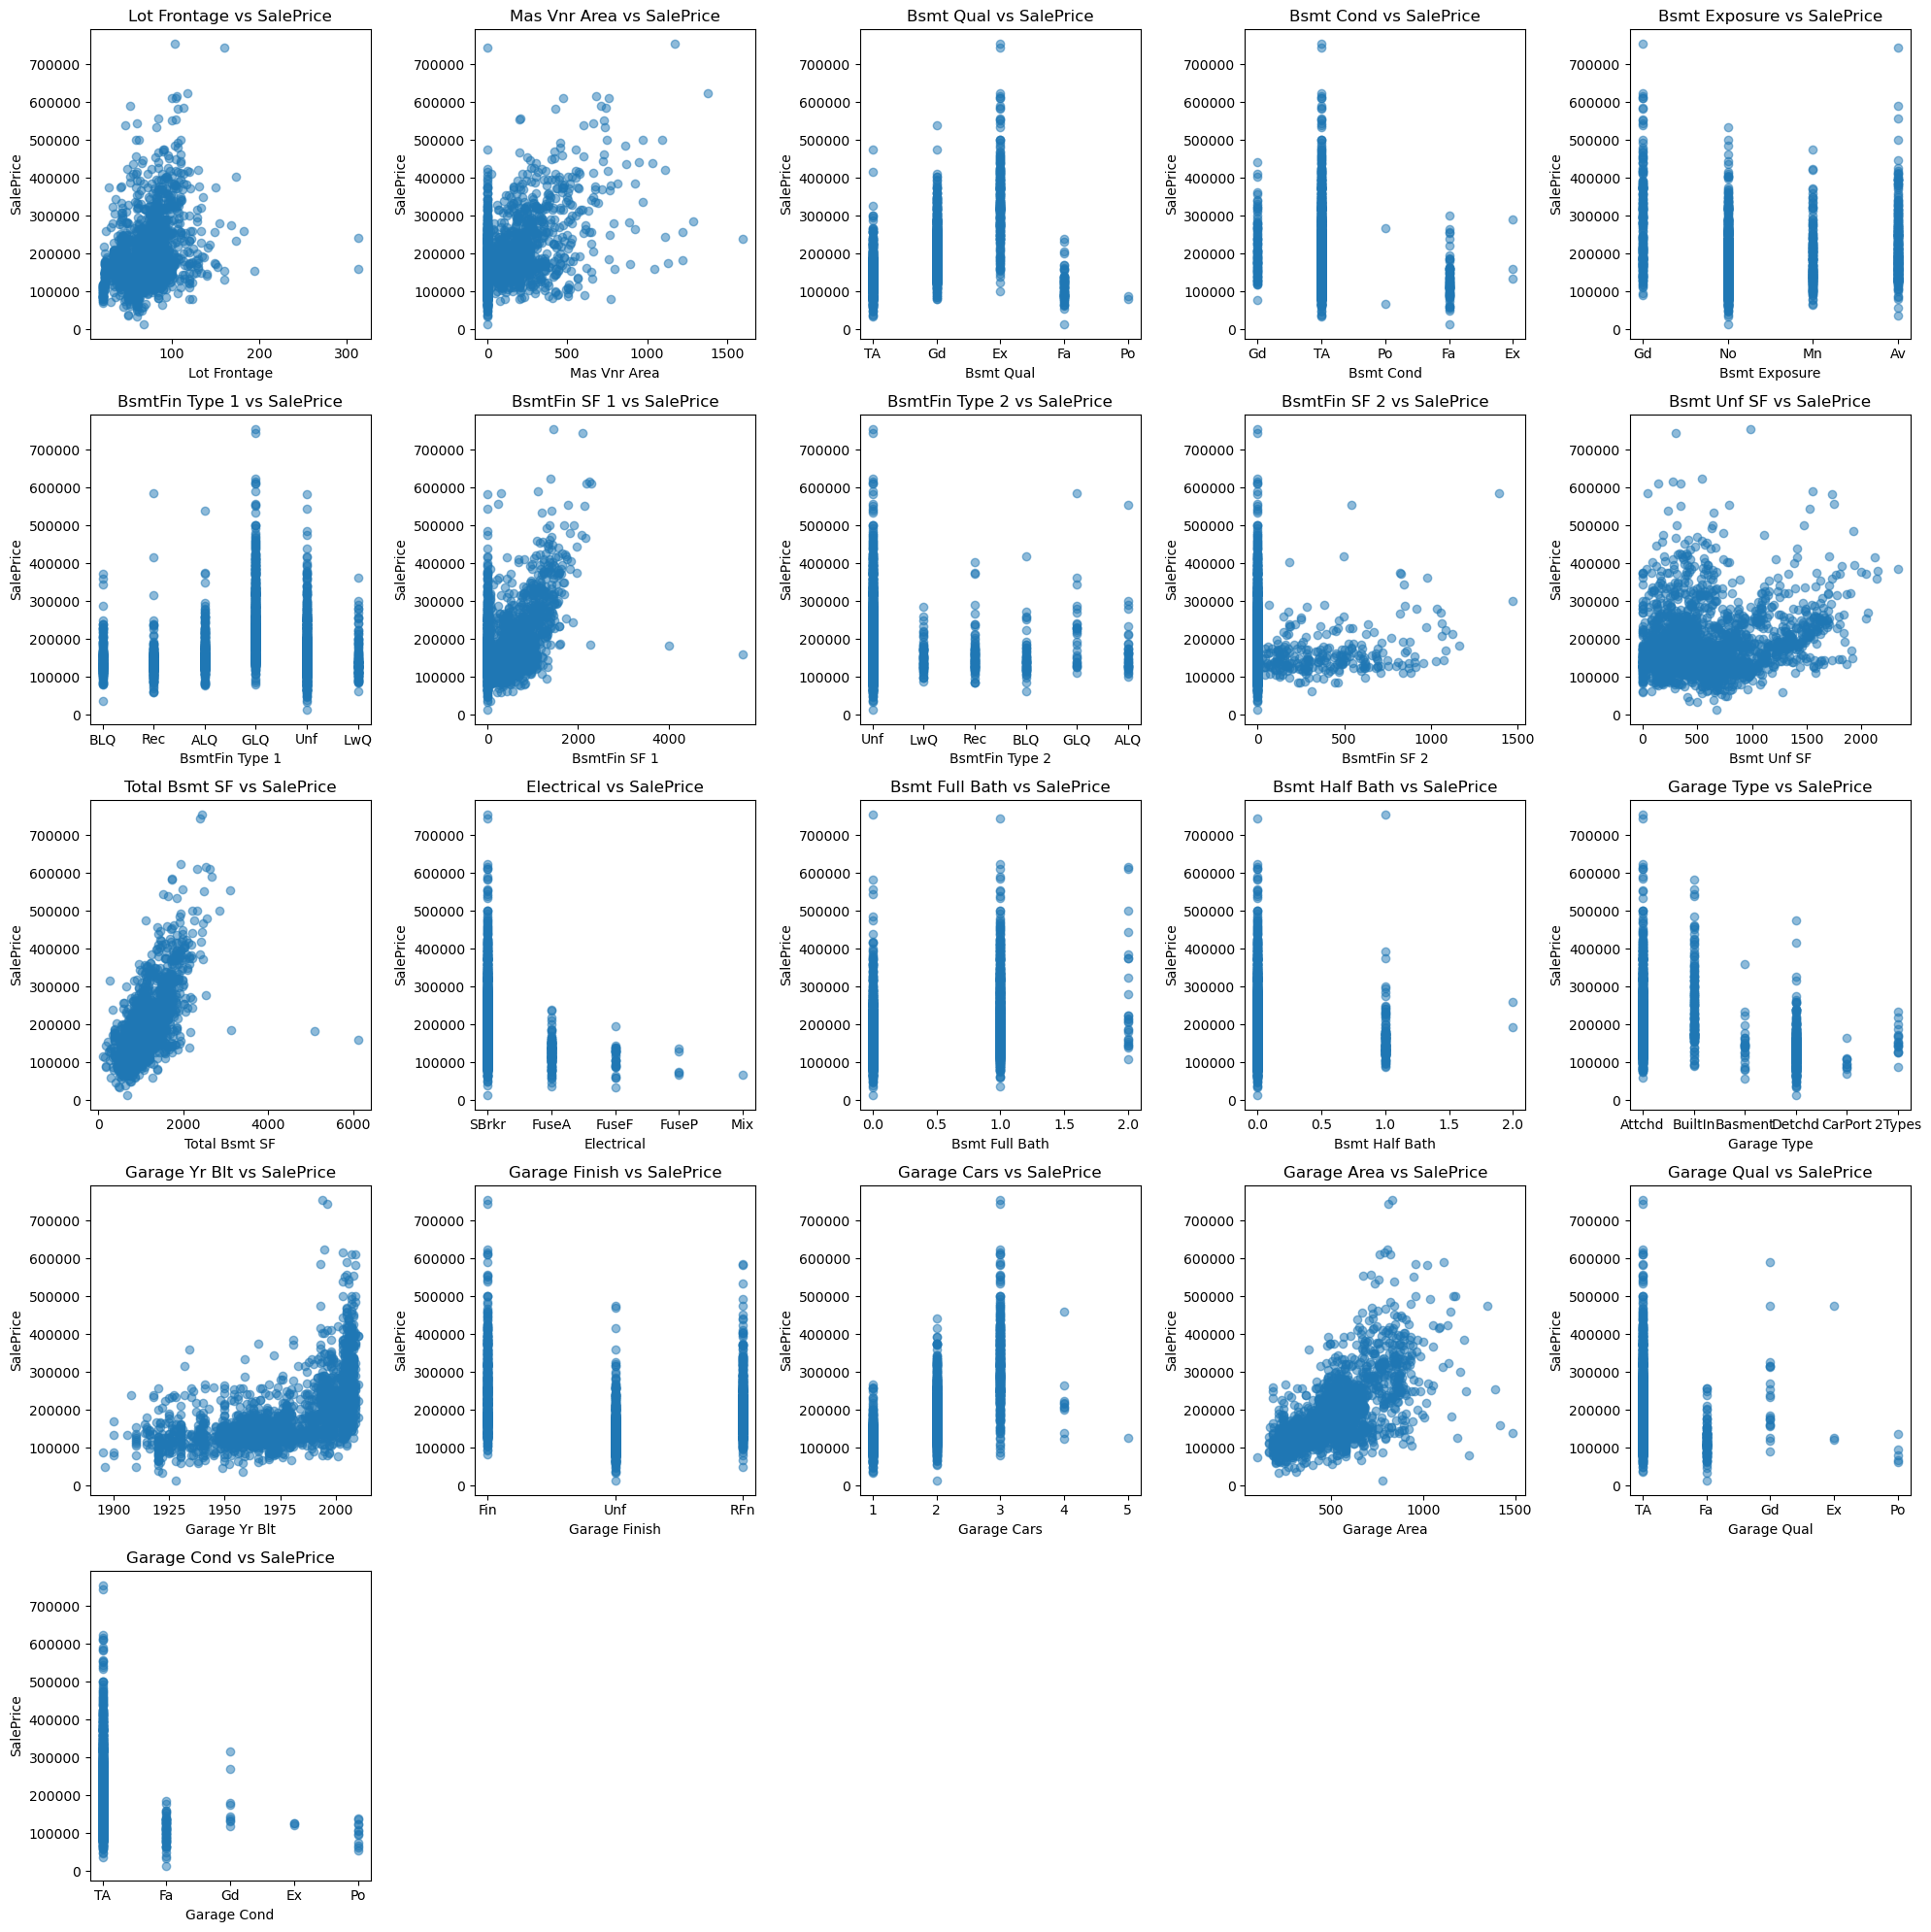

In [20]:
#PLOTTING FEATURES WITH NAN VS SALEPRICE

target = 'SalePrice'
num_features = len(nan_features)
rows = 5
cols = min(num_features, rows)
plot_rows = (num_features + rows - 1) // rows

fig, axes = plt.subplots(plot_rows, cols, figsize=(cols * 4, plot_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(nan_features):
    axes[i].scatter(nan_features_df[feature], nan_features_df[target], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'{feature} vs {target}')

# Hide any unused subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Looking at the graphs**:  
        -WEEK CORRELATION: For simplicity and given its apparent weak correlation with "SalePrice", we prefer to drop these features: "Bsmt Exposure" and "Garage Finish".  
        -TO BE IMPUTED: "Mas Vnr Area" "Garage Type", "Garage Yr Blt", and "Garage Cond" will have missing values replaced using the mean, mode, or median, depending on the data type and distribution.  
        -DROPPING NAN DATA: For simplicity, and given the relatively low number of missing values, the "Bsmt..." features will be kept, with only the NaN values being dropped. Same reasoning for "Electrical", "Bsmt Half Bath", "Bsmt Full Bath", "Garage Area" and "Garage Cars".  
        -CORRELATED FEATURES: "Garage Cond" and "Garage Qual" appear to carry similar information. We will keep only "Garage Cond".

In [21]:
#DROPPING ADDITIONAL COLUMNS
additional_to_drop = ["Bsmt Exposure", "Garage Qual", "Garage Finish", "Garage Qual"]

In [22]:
df = df.drop(additional_to_drop, axis=1)

In [23]:
df

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0              20        RL         141.0     31770   Pave       IR1   
1              20        RH          80.0     11622   Pave       Reg   
2              20        RL          81.0     14267   Pave       IR1   
3              20        RL          93.0     11160   Pave       Reg   
4              60        RL          74.0     13830   Pave       IR1   
...           ...       ...           ...       ...    ...       ...   
2925           80        RL          37.0      7937   Pave       IR1   
2926           20        RL           NaN      8885   Pave       IR1   
2927           85        RL          62.0     10441   Pave       Reg   
2928           20        RL          77.0     10010   Pave       Reg   
2929           60        RL          74.0      9627   Pave       Reg   

     Land Contour Utilities Lot Config Land Slope  ... Enclosed Porch  \
0             Lvl    AllPub     Corner        Gtl  ...              0   
1             Lvl    AllPub     Inside        Gtl  ...              0   
2             Lvl    AllPub     Corner        Gtl  ...              0   
3             Lvl    AllPub     Corner        Gtl  ...              0   
4             Lvl    AllPub     Inside        Gtl  ...              0   
...           ...       ...        ...        ...  ...            ...   
2925          Lvl    AllPub    CulDSac        Gtl  ...              0   
2926          Low    AllPub     Inside        Mod  ...              0   
2927          Lvl    AllPub     Inside        Gtl  ...              0   
2928          Lvl    AllPub     Inside        Mod  ...              0   
2929          Lvl    AllPub     Inside        Mod  ...              0   

     3Ssn Porch Screen Porch Pool Area Misc Val  Mo Sold  Yr Sold  Sale Type  \
0             0            0         0        0        5     2010        WD    
1             0          120         0        0        6     2010        WD    
2             0            0         0    12500        6     2010        WD    
3             0            0         0        0        4     2010        WD    
4             0            0         0        0        3     2010        WD    
...         ...          ...       ...      ...      ...      ...        ...   
2925          0            0         0        0        3     2006        WD    
2926          0            0         0        0        6     2006        WD    
2927          0            0         0      700        7     2006        WD    
2928          0            0         0        0        4     2006        WD    
2929          0            0         0        0       11     2006        WD    

      Sale Condition SalePrice  
0             Normal    215000  
1             Normal    105000  
2             Normal    172000  
3             Normal    244000  
4             Normal    189900  
...              ...       ...  
2925          Normal    142500  
2926          Normal    131000  
2927          Normal    132000  
2928          Normal    170000  
2929          Normal    188000  

[2930 rows x 71 columns]

# 1.2 - Missing Values : Imputation

In the preview part, we have identified features whose missing values could be imputed without introducing too much noise.
We will now look at it. , "Mas Vnr Area", "Garage Type", "Garage Yr Blt", "Garage Cond"]

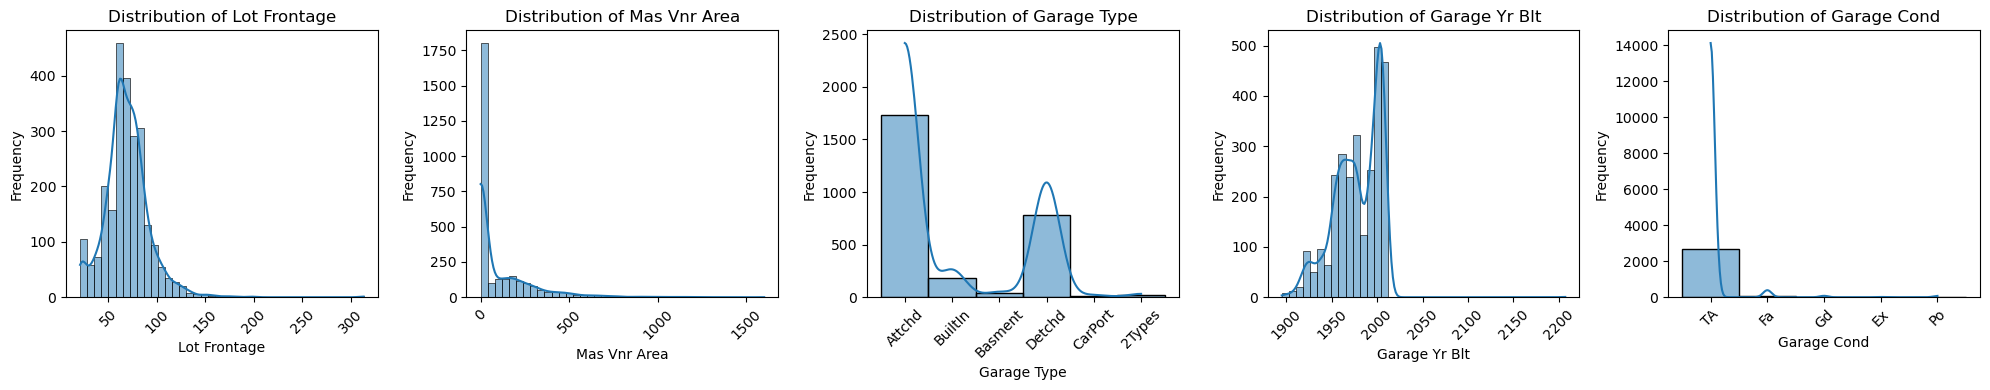

In [24]:
#FEATURES VALUES DISTRIBUTION
features_to_imputed = ["Lot Frontage", "Mas Vnr Area", "Garage Type", "Garage Yr Blt", "Garage Cond"]
num_features = len(features_to_imputed)
cols = min(num_features, rows)
plot_rows = (num_features + rows - 1) // rows

fig, axes = plt.subplots(plot_rows, cols, figsize=(cols * 4, plot_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(features_to_imputed):
   
    data = df[feature].dropna().copy()  
    data = pd.DataFrame(data)

    sns.histplot(data=data, x=feature, bins=40, kde=True, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [25]:
#MAS VNR AREA
#Given the form of the distribution, the mean might be too sensitive to extreme values. NaN will be replaced by the median
median_MasVnrArea = df["Mas Vnr Area"].median()
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(median_MasVnrArea) 

In [26]:
#GARADE TYPE
#As this is a categorical variable, NaN will be replaced by the mode. From the repartition, it should not induce too much noise.
mode_GarageType = df["Garage Type"].mode()
df["Garage Type"] = df["Garage Type"].fillna(mode_GarageType)

In [27]:
#GARAGE YR BLT
mean_GarageYrBlt = df["Garage Yr Blt"].mean()
median_GarageYrBlt = df["Garage Yr Blt"].median()

In [28]:
#"Garage Yr Blt"
print('the difference between the mean and the variance is :', mean_GarageYrBlt - median_GarageYrBlt)

the difference between the mean and the variance is : -0.8675568386863688


In [29]:
#"Garage Yr Blt"
#The difference between the mean and the median is relatively weak, we will go with the mean
df["Garage Yr Blt"] = df["Garage Yr Blt"].fillna(mean_GarageYrBlt)

In [30]:
#"LOT FRONTAGE"
#Nan will be replaced by the mean
mean_LotFrontage = df["Lot Frontage"].mean()
df["Lot Frontage"] = df["Lot Frontage"].fillna(mean_LotFrontage)

In [31]:
#GARAGE COND
#As this is a categorical variable, NaN will be replaced by the mode.
mode_GaradeCond = df["Garage Cond"].mode()
df["Garage Cond"] = df["Garage Cond"].fillna(mode_GaradeCond)

At this point, some feature still have missing values. As discussed previously, we will just drop the NaNs.

In [32]:
#DROPPING NAN
df = df.dropna()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2703 entries, 0 to 2929
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2703 non-null   int64  
 1   MS Zoning        2703 non-null   object 
 2   Lot Frontage     2703 non-null   float64
 3   Lot Area         2703 non-null   int64  
 4   Street           2703 non-null   object 
 5   Lot Shape        2703 non-null   object 
 6   Land Contour     2703 non-null   object 
 7   Utilities        2703 non-null   object 
 8   Lot Config       2703 non-null   object 
 9   Land Slope       2703 non-null   object 
 10  Neighborhood     2703 non-null   object 
 11  Condition 1      2703 non-null   object 
 12  Condition 2      2703 non-null   object 
 13  Bldg Type        2703 non-null   object 
 14  House Style      2703 non-null   object 
 15  Overall Qual     2703 non-null   int64  
 16  Overall Cond     2703 non-null   int64  
 17  Year Built       27

# 1.3 - Exploration and Standartization

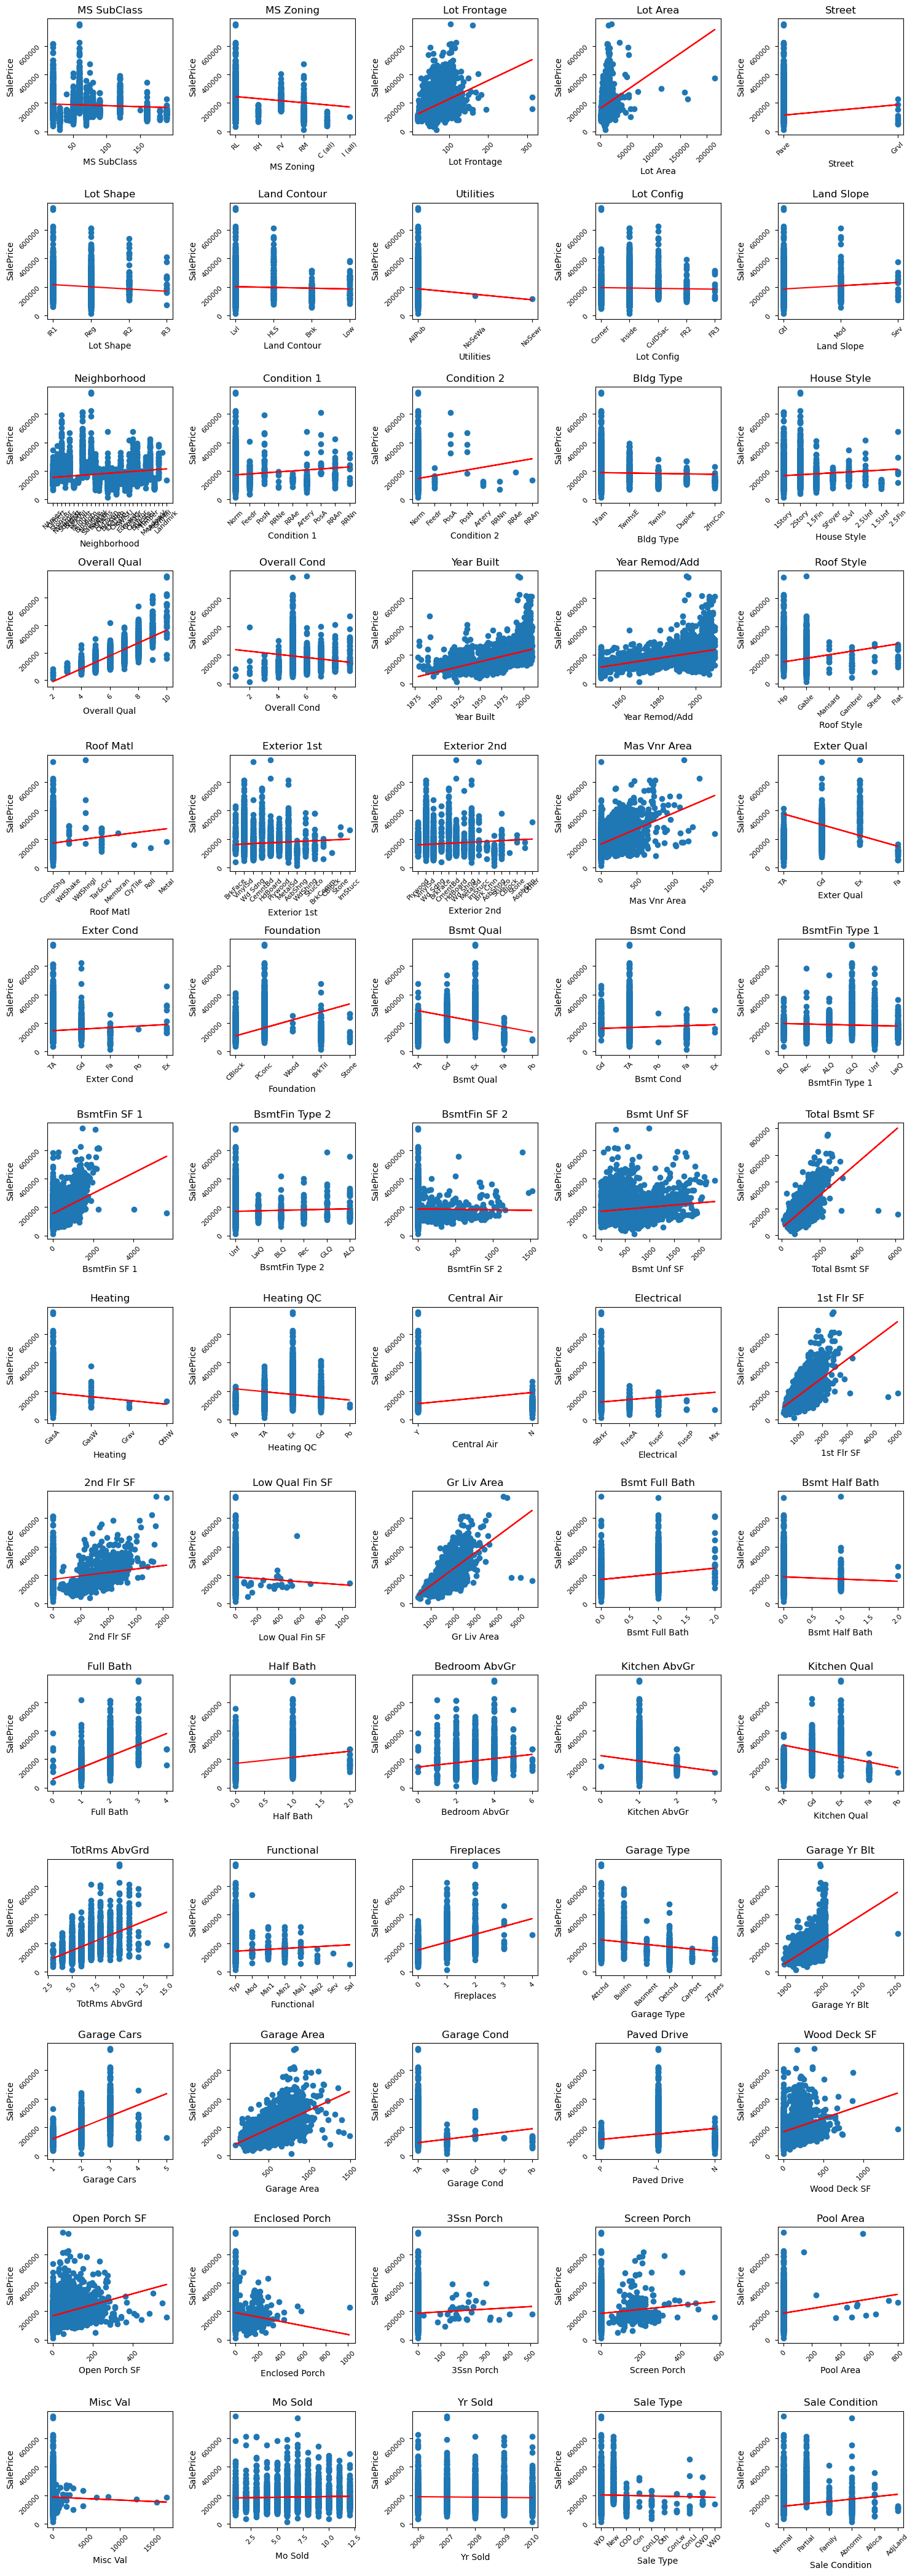

In [34]:
#SCATTER PLOT OF ALL FEATURES AGAINST SALEPRICES

features = df.drop(columns=[target]).columns

cols_per_row = 5
n_rows = (len(features) + cols_per_row - 1) // cols_per_row


fig, axes = plt.subplots(n_rows, cols_per_row, figsize=(15, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(features):

    model = LinearRegression()

    if df[feature].dtype == 'object':
        data = df[feature].copy()
        encoder = LabelEncoder()
        data = encoder.fit_transform(data)

    else :
        data = df[feature].copy()
        #print(feature)
        #print(data)

    data = pd.DataFrame(data)
    
    #for_linear = data.reshape(-1, 1)
    model.fit(data, df[target])
    linear = model.predict(data)
    
    #axes[0].plot(train_target_df, insample_y_pred, '.')
    
    axes[i].scatter(df[feature], df[target])
    axes[i].plot(data, linear, color = 'red')
    
    #axes[i].scatter(df[feature], df[target])
    axes[i].set_title(feature)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target)

    axes[i].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i].tick_params(axis='y', rotation=45, labelsize=8)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [35]:
#STANDARTIZATION OR NORMALISATION? => STANDARTIZATION

scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop(["SalePrice"])

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df_scalled = df.copy()

df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0    -0.878591        RL      3.364678  2.671941   Pave       IR1   
1    -0.878591        RH      0.490438  0.169812   Pave       Reg   
2    -0.878591        RL      0.537556  0.498288   Pave       IR1   
3    -0.878591        RL      1.102981  0.112437   Pave       Reg   
4     0.085318        RL      0.207726  0.444018   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope  ... Enclosed Porch 3Ssn Porch  \
0          Lvl    AllPub     Corner        Gtl  ...      -0.345058  -0.104135   
1          Lvl    AllPub     Inside        Gtl  ...      -0.345058  -0.104135   
2          Lvl    AllPub     Corner        Gtl  ...      -0.345058  -0.104135   
3          Lvl    AllPub     Corner        Gtl  ...      -0.345058  -0.104135   
4          Lvl    AllPub     Inside        Gtl  ...      -0.345058  -0.104135   

  Screen Porch Pool Area   Misc Val   Mo Sold   Yr Sold  Sale Type  \
0    -0.293500  -0.06273  -0.086362 -0.451866  1.681851        WD    
1     1.801334  -0.06273  -0.086362 -0.083421  1.681851        WD    
2    -0.293500  -0.06273  21.369348 -0.083421  1.681851        WD    
3    -0.293500  -0.06273  -0.086362 -0.820310  1.681851        WD    
4    -0.293500  -0.06273  -0.086362 -1.188754  1.681851        WD    

   Sale Condition SalePrice  
0          Normal    215000  
1          Normal    105000  
2          Normal    172000  
3          Normal    244000  
4          Normal    189900  

[5 rows x 71 columns]

**WHY NORMALISED OR STANDARDIZED DATA IN THE MODEL TRAINING PROCESS?**

-Data standardization and normalization are essential preprocessing steps in machine learning, ensuring that features are on a similar scale for better model performance. Standardization transforms data to have a mean of zero and a standard deviation of one, making features contribute equally and speeding up convergence in gradient-based algorithms like logistic regression and neural networks. Normalization, on the other hand, rescales features to a range between 0 and 1 or -1 and 1, which is especially useful for models that rely on distance metrics, like k-nearest neighbors and SVMs. Both processes prevent large-scale features from dominating smaller ones, reduce numerical instability, and improve the accuracy of regularization-based models like ridge and lasso regression. These techniques also enhance the interpretability and balance of feature contributions, ensuring that models learn from all variables consistently.

-Standardization is better suited for linear regression because it centers the data around a mean of zero and scales it, ensuring that all features contribute equally. This prevents larger scale features from dominating the model and helps linear regression meet assumptions like homoscedasticity, leading to more reliable coefficient estimates and better model performance.

In [36]:
#CONVERTING NON-NUMERICAL TO NUMERICAL

label_encoder = LabelEncoder()
non_numerical_columns = df.select_dtypes(include=['object']).columns

for column in non_numerical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  Lot Shape  \
0    -0.878591          4      3.364678  2.671941       1          0   
1    -0.878591          3      0.490438  0.169812       1          3   
2    -0.878591          4      0.537556  0.498288       1          0   
3    -0.878591          4      1.102981  0.112437       1          3   
4     0.085318          4      0.207726  0.444018       1          0   

   Land Contour  Utilities  Lot Config  Land Slope  ...  Enclosed Porch  \
0             3          0           0           0  ...       -0.345058   
1             3          0           4           0  ...       -0.345058   
2             3          0           0           0  ...       -0.345058   
3             3          0           0           0  ...       -0.345058   
4             3          0           4           0  ...       -0.345058   

   3Ssn Porch  Screen Porch  Pool Area   Misc Val   Mo Sold   Yr Sold  \
0   -0.104135     -0.293500   -0.06273  -0.086362 -0.451866  1.681851   
1   -0.104135      1.801334   -0.06273  -0.086362 -0.083421  1.681851   
2   -0.104135     -0.293500   -0.06273  21.369348 -0.083421  1.681851   
3   -0.104135     -0.293500   -0.06273  -0.086362 -0.820310  1.681851   
4   -0.104135     -0.293500   -0.06273  -0.086362 -1.188754  1.681851   

   Sale Type  Sale Condition  SalePrice  
0          9               4     215000  
1          9               4     105000  
2          9               4     172000  
3          9               4     244000  
4          9               4     189900  

[5 rows x 71 columns]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2703 entries, 0 to 2929
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2703 non-null   float64
 1   MS Zoning        2703 non-null   int64  
 2   Lot Frontage     2703 non-null   float64
 3   Lot Area         2703 non-null   float64
 4   Street           2703 non-null   int64  
 5   Lot Shape        2703 non-null   int64  
 6   Land Contour     2703 non-null   int64  
 7   Utilities        2703 non-null   int64  
 8   Lot Config       2703 non-null   int64  
 9   Land Slope       2703 non-null   int64  
 10  Neighborhood     2703 non-null   int64  
 11  Condition 1      2703 non-null   int64  
 12  Condition 2      2703 non-null   int64  
 13  Bldg Type        2703 non-null   int64  
 14  House Style      2703 non-null   int64  
 15  Overall Qual     2703 non-null   float64
 16  Overall Cond     2703 non-null   float64
 17  Year Built       27

**WHY NOT ONE-HOT ENCODING?**  
Given the high number of categorical features, going for a one-hot encoding method would be too costly computationally speaking. After deriving the different levels of importance of each variable, we will try to see if any improvement can be envisaged.

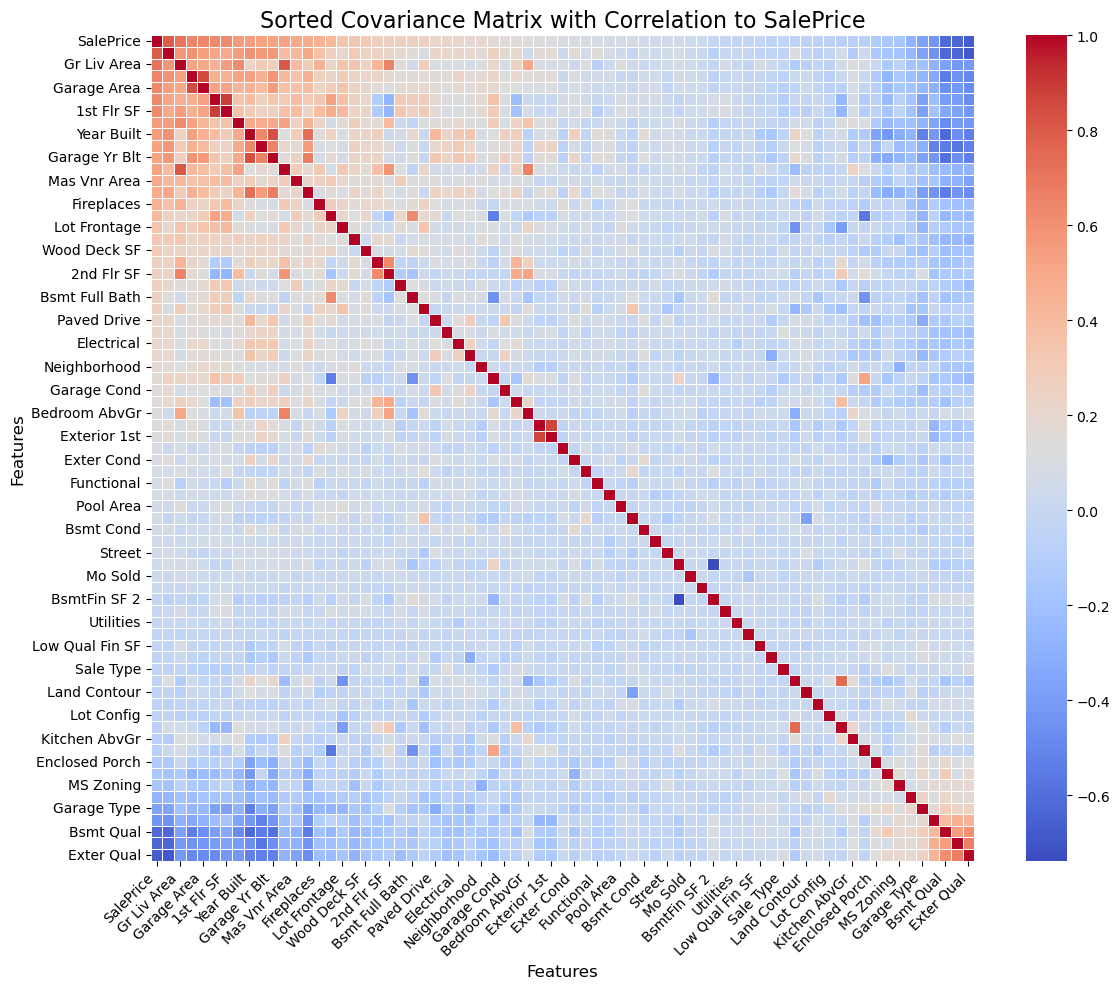

In [38]:
#CORRELATION MATRIX AND HEATMAP

correlation_matrix = df.corr()

sorted_correlation = correlation_matrix.sort_values(by='SalePrice', ascending=False, axis=0)
sorted_correlation = sorted_correlation[sorted_correlation.index]  

plt.figure(figsize=(12, 10))

sns.heatmap(sorted_correlation, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.title('Sorted Covariance Matrix with Correlation to SalePrice', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.tight_layout()

plt.show()

In [39]:
sorted_correlation

SalePrice  Overall Qual  Gr Liv Area  Garage Cars  Garage Area  \
SalePrice      1.000000      0.793665     0.714816     0.653171     0.634338   
Overall Qual   0.793665      1.000000     0.578569     0.595608     0.540831   
Gr Liv Area    0.714816      0.578569     1.000000     0.518460     0.503557   
Garage Cars    0.653171      0.595608     0.518460     1.000000     0.846193   
Garage Area    0.634338      0.540831     0.503557     0.846193     1.000000   
...                 ...           ...          ...          ...          ...   
Garage Type   -0.365598     -0.358137    -0.199206    -0.266851    -0.248545   
Heating QC    -0.428544     -0.451226    -0.290189    -0.343252    -0.286833   
Bsmt Qual     -0.620752     -0.623607    -0.381664    -0.539723    -0.466258   
Kitchen Qual  -0.633223     -0.629855    -0.413467    -0.444369    -0.423903   
Exter Qual    -0.672285     -0.685772    -0.418516    -0.491209    -0.479099   

              Total Bsmt SF  1st Flr SF  Full Bath  Year Built  \
SalePrice          0.629390    0.628041   0.553996    0.546299   
Overall Qual       0.515801    0.491168   0.545993    0.597074   
Gr Liv Area        0.461863    0.550313   0.626564    0.245363   
Garage Cars        0.465514    0.452527   0.529833    0.533827   
Garage Area        0.520227    0.511412   0.433858    0.456803   
...                     ...         ...        ...         ...   
Garage Type       -0.380935   -0.382078  -0.281041   -0.526835   
Heating QC        -0.222727   -0.187768  -0.361082   -0.425211   
Bsmt Qual         -0.393443   -0.340274  -0.478937   -0.617453   
Kitchen Qual      -0.403950   -0.371498  -0.403661   -0.462258   
Exter Qual        -0.474933   -0.420213  -0.424785   -0.525321   

              Year Remod/Add  ...  BsmtFin Type 1  Enclosed Porch  \
SalePrice           0.526641  ...       -0.080978       -0.123702   
Overall Qual        0.565760  ...        0.016913       -0.139261   
Gr Liv Area         0.312479  ...        0.072655        0.004226   
Garage Cars         0.461271  ...       -0.003266       -0.125316   
Garage Area         0.390428  ...       -0.032612       -0.092727   
...                      ...  ...             ...             ...   
Garage Type        -0.300300  ...        0.170206        0.170456   
Heating QC         -0.516266  ...       -0.074917        0.104862   
Bsmt Qual          -0.543322  ...       -0.024875        0.190135   
Kitchen Qual       -0.566577  ...       -0.023543        0.111710   
Exter Qual         -0.522718  ...       -0.042950        0.125347   

              Overall Cond  MS Zoning  Lot Shape  Garage Type  Heating QC  \
SalePrice        -0.147935  -0.154360  -0.278693    -0.365598   -0.428544   
Overall Qual     -0.170184  -0.185705  -0.252547    -0.358137   -0.451226   
Gr Liv Area      -0.142659  -0.060099  -0.190127    -0.199206   -0.290189   
Garage Cars      -0.264688  -0.139148  -0.216076    -0.266851   -0.343252   
Garage Area      -0.225960  -0.164417  -0.180751    -0.248545   -0.286833   
...                    ...        ...        ...          ...         ...   
Garage Type       0.221138   0.123528   0.228710     1.000000    0.189038   
Heating QC        0.082515   0.187636   0.118737     0.189038    1.000000   
Bsmt Qual         0.305697   0.179816   0.225219     0.292983    0.407904   
Kitchen Qual      0.088661   0.181031   0.159970     0.226827    0.464744   
Exter Qual        0.205643   0.198990   0.173703     0.254116    0.448159   

              Bsmt Qual  Kitchen Qual  Exter Qual  
SalePrice     -0.620752     -0.633223   -0.672285  
Overall Qual  -0.623607     -0.629855   -0.685772  
Gr Liv Area   -0.381664     -0.413467   -0.418516  
Garage Cars   -0.539723     -0.444369   -0.491209  
Garage Area   -0.466258     -0.423903   -0.479099  
...                 ...           ...         ...  
Garage Type    0.292983      0.226827    0.254116  
Heating QC     0.407904      0.464744    0.448159  
Bsmt Qual      1.000000      0.539534 

We have generated a correlation matrix, ranking from the highest correlation with SalePrice to the lowest correlation. We can then easily identify the features most correlated to the target.

# 2 - MODELS

In [40]:
#DATA SPLIT

#Log of SalePrice
SalePrice = df.SalePrice
Log_SalePrice = np.log(df.SalePrice)
Log_SalePrice = Log_SalePrice.rename("Log_SalePrice")
X = df.drop("SalePrice", axis = 1)

#Splitting
X_train, X_test, SalePrice_train, SalePrice_test, LogSalePrice_train, LogSalePrice_test = \
                                        train_test_split(X, SalePrice, Log_SalePrice,  test_size=0.20, random_state=2002)

# 2.1 - Classic Regression

In [41]:
#RIDGE REGRESSION FUNCTION
def classic_regression(train_features_df, train_target_df, test_features_df, test_target_df, plotFlag):

    classiclinear = LinearRegression()
    classiclinear.fit(train_features_df, train_target_df)
    insample_y_pred = classiclinear.predict(train_features_df)  
    insample_rss = sum((insample_y_pred-train_target_df)**2)

    #Performance metrics
    outsample_y_pred = classiclinear.predict(test_features_df)
    
    msr = mean_squared_error(test_target_df, outsample_y_pred)
    rmse = np.sqrt(msr)
    r_squared = r2_score(test_target_df, outsample_y_pred)

    return_dico = {}
    return_dico["Training Set RSS"] = insample_rss
    return_dico["Intercept"] = classiclinear.intercept_
    return_dico["Coefficients"] = classiclinear.coef_
    return_dico["MSR"] = msr
    return_dico["RMSE"] = rmse
    return_dico["R^2"] = r_squared
    
    if plotFlag == True:

        model = LinearRegression()
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        axes = axes.flatten()
        
        #plt.subplot(plotarea)
        for_linear = train_target_df.values.reshape(-1, 1)
        model.fit(for_linear, insample_y_pred)
        linear_insampe = model.predict(for_linear)
        axes[0].plot(train_target_df, insample_y_pred, '.')
        axes[0].plot(train_target_df, linear_insampe)
        axes[0].set_title("TrainSet")
        axes[0].set_xlabel("Predicted")
        axes[0].set_ylabel("Actual")
        axes[0].tick_params(axis='x', rotation=45, labelsize=8)
        axes[0].tick_params(axis='y', rotation=45, labelsize=8)

   
        for_linear = test_target_df.values.reshape(-1, 1)
        model.fit(for_linear, outsample_y_pred)
        linear_insampe = model.predict(for_linear)
        axes[1].plot(test_target_df, outsample_y_pred, '.')
        axes[1].plot(test_target_df, linear_insampe)
        axes[1].set_title("TestSet")
        axes[1].set_xlabel("Predicted")
        axes[1].set_ylabel("Actual")
        axes[1].tick_params(axis='x', rotation=45, labelsize=8)
        axes[1].tick_params(axis='y', rotation=45, labelsize=8)

        #Test set residual

        residuals = test_target_df - outsample_y_pred
        for_linear = outsample_y_pred.reshape(-1, 1)
        model.fit(for_linear, residuals)
        linear_insampe = model.predict(for_linear)
        axes[2].scatter(outsample_y_pred, residuals)
        axes[2].plot(outsample_y_pred, linear_insampe, color = 'orange')
        #axes[2].set_axhline(y=0, color='r', linestyle='--')
        axes[2].set_xlabel('Predicted Values')
        axes[2].set_ylabel('Residuals')
        axes[2].set_title('Residual Plot')
        axes[2].tick_params(axis='x', rotation=45, labelsize=8)
        axes[2].tick_params(axis='y', rotation=45, labelsize=8)
        
        #plt.plot(train_target_df, insample_y_pred,)
        #plt.plot(train_features_df, insample_y_pred)
        #plt.plot(train_features_df, train_target_df,'.')
        #plt.ylabel("SalePrice")
        #plt.title('Plot for alpha: %f'%alpha)
        
        plt.tight_layout()
        plt.show()
    
    return return_dico

# 2.2 - Ridge

In [42]:
#RIDGE REGRESSION FUNCTION
def ridge_regression(train_features_df, train_target_df, test_features_df, test_target_df, alpha, plotFlag):
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(train_features_df, train_target_df)
    insample_y_pred = ridgereg.predict(train_features_df)  
    insample_rss = sum((insample_y_pred-train_target_df)**2)

    #Performance metrics
    outsample_y_pred = ridgereg.predict(test_features_df)
    
    msr = mean_squared_error(test_target_df, outsample_y_pred)
    rmse = np.sqrt(msr)
    r_squared = r2_score(test_target_df, outsample_y_pred)

    return_dico = {}
    return_dico["Training Set RSS"] = insample_rss
    return_dico["Intercept"] = ridgereg.intercept_
    return_dico["Coefficients"] = ridgereg.coef_
    return_dico["MSR"] = msr
    return_dico["RMSE"] = rmse
    return_dico["R^2"] = r_squared


    
    if plotFlag == True:

        model = LinearRegression()
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        axes = axes.flatten()
        
        #plt.subplot(plotarea)
        for_linear = train_target_df.values.reshape(-1, 1)
        model.fit(for_linear, insample_y_pred)
        linear_insampe = model.predict(for_linear)
        axes[0].plot(train_target_df, insample_y_pred, '.')
        axes[0].plot(train_target_df, linear_insampe)
        axes[0].set_title("TrainSet")
        axes[0].set_xlabel("Predicted")
        axes[0].set_ylabel("Actual")
        axes[0].tick_params(axis='x', rotation=45, labelsize=8)
        axes[0].tick_params(axis='y', rotation=45, labelsize=8)

   
        for_linear = test_target_df.values.reshape(-1, 1)
        model.fit(for_linear, outsample_y_pred)
        linear_insampe = model.predict(for_linear)
        axes[1].plot(test_target_df, outsample_y_pred, '.')
        axes[1].plot(test_target_df, linear_insampe)
        axes[1].set_title("TestSet")
        axes[1].set_xlabel("Predicted")
        axes[1].set_ylabel("Actual")
        axes[1].tick_params(axis='x', rotation=45, labelsize=8)
        axes[1].tick_params(axis='y', rotation=45, labelsize=8)

        #Test set residual
        residuals = test_target_df - outsample_y_pred
        for_linear = outsample_y_pred.reshape(-1, 1)
        model.fit(for_linear, residuals)
        linear_insampe = model.predict(for_linear)
        axes[2].scatter(outsample_y_pred, residuals)
        axes[2].plot(outsample_y_pred, linear_insampe, color = 'orange')
        #axes[2].set_axhline(y=0, color='r', linestyle='--')
        axes[2].set_xlabel('Predicted Values')
        axes[2].set_ylabel('Residuals')
        axes[2].set_title('Residual Plot')
        axes[2].tick_params(axis='x', rotation=45, labelsize=8)
        axes[2].tick_params(axis='y', rotation=45, labelsize=8)
        
        #plt.plot(train_target_df, insample_y_pred,)
        #plt.plot(train_features_df, insample_y_pred)
        #plt.plot(train_features_df, train_target_df,'.')
        #plt.ylabel("SalePrice")
        #plt.title('Plot for alpha: %f'%alpha)
        
        plt.tight_layout()
        plt.show()
    
    return return_dico

# 2.3 - Lasso

In [43]:
#LASSO REGRESSION FUNCTION
def lasso_regression(train_features_df, train_target_df, test_features_df, test_target_df, alpha, plotFlag):
    lassoreg = Lasso(alpha=alpha, max_iter=2000000)
    lassoreg.fit(train_features_df, train_target_df)
    insample_y_pred = lassoreg.predict(train_features_df)  
    insample_rss = sum((insample_y_pred-train_target_df)**2)

    #Performance metrics
    outsample_y_pred = lassoreg.predict(test_features_df)
    
    msr = mean_squared_error(test_target_df, outsample_y_pred)
    rmse = np.sqrt(msr)
    r_squared = r2_score(test_target_df, outsample_y_pred)

    return_dico = {}
    return_dico["Training Set RSS"] = insample_rss
    return_dico["Intercept"] = lassoreg.intercept_
    return_dico["Coefficients"] = lassoreg.coef_
    return_dico["MSR"] = msr
    return_dico["RMSE"] = rmse
    return_dico["R^2"] = r_squared

    if plotFlag == True:

        model = LinearRegression()
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        axes = axes.flatten()
        
        #plt.subplot(plotarea)
        for_linear = train_target_df.values.reshape(-1, 1)
        model.fit(for_linear, insample_y_pred)
        linear_insampe = model.predict(for_linear)
        axes[0].plot(train_target_df, insample_y_pred, '.')
        axes[0].plot(train_target_df, linear_insampe)
        axes[0].set_title("TrainSet")
        axes[0].set_xlabel("Predicted")
        axes[0].set_ylabel("Actual")
        axes[0].tick_params(axis='x', rotation=45, labelsize=8)
        axes[0].tick_params(axis='y', rotation=45, labelsize=8)

   
        for_linear = test_target_df.values.reshape(-1, 1)
        model.fit(for_linear, outsample_y_pred)
        linear_insampe = model.predict(for_linear)
        axes[1].plot(test_target_df, outsample_y_pred, '.')
        axes[1].plot(test_target_df, linear_insampe)
        axes[1].set_title("TestSet")
        axes[1].set_xlabel("Predicted")
        axes[1].set_ylabel("Actual")
        axes[1].tick_params(axis='x', rotation=45, labelsize=8)
        axes[1].tick_params(axis='y', rotation=45, labelsize=8)

        #Test set residual

        residuals = test_target_df - outsample_y_pred
        for_linear = outsample_y_pred.reshape(-1, 1)
        model.fit(for_linear, residuals)
        linear_insampe = model.predict(for_linear)
        axes[2].scatter(outsample_y_pred, residuals)
        axes[2].plot(outsample_y_pred, linear_insampe, color = 'orange')
        #axes[2].set_axhline(y=0, color='r', linestyle='--')
        axes[2].set_xlabel('Predicted Values')
        axes[2].set_ylabel('Residuals')
        axes[2].set_title('Residual Plot')
        axes[2].tick_params(axis='x', rotation=45, labelsize=8)
        axes[2].tick_params(axis='y', rotation=45, labelsize=8)

        
        #plt.plot(train_target_df, insample_y_pred,)
        #plt.plot(train_features_df, insample_y_pred)
        #plt.plot(train_features_df, train_target_df,'.')
        #plt.ylabel("SalePrice")
        #plt.title('Plot for alpha: %f'%alpha)
        
        plt.tight_layout()
        plt.show()
    
    return return_dico

# 3 - PREDICTIONS AND PERFORMANCES

# 3.1 - Classic Linear

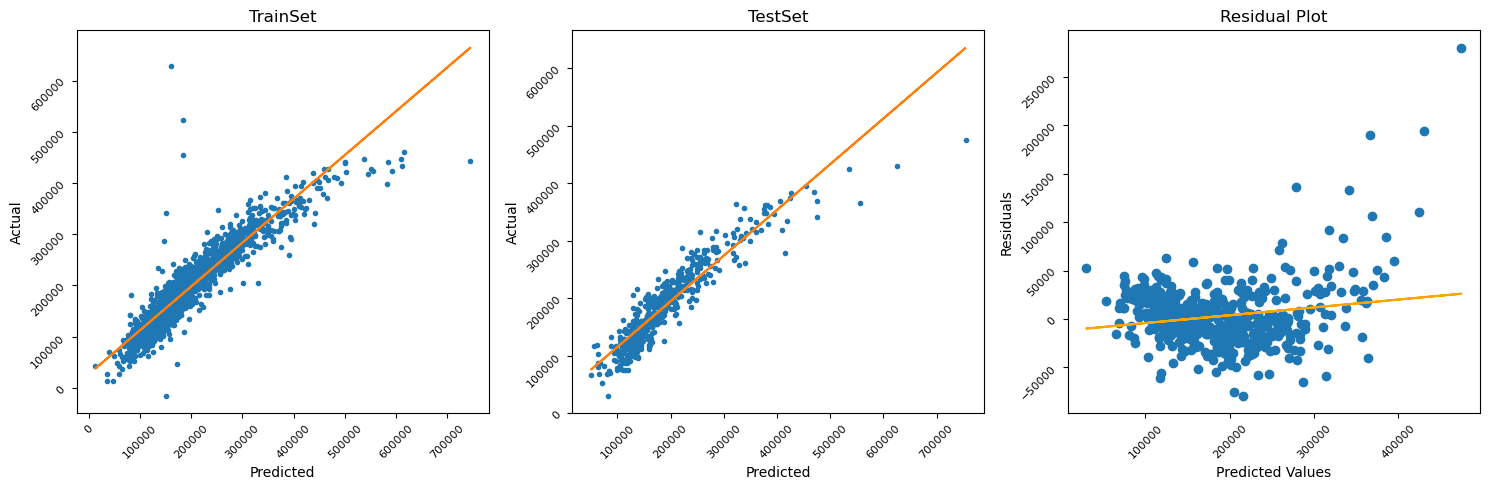

In [44]:
classic_reg = classic_regression(X_train, SalePrice_train, X_test, SalePrice_test, True)

In [45]:
classic_reg

{'Training Set RSS': 1999481839220.0566,
 'Intercept': 155434.59317183163,
 'Coefficients': array([-4.71422121e+03, -7.07171870e+02, -1.45998877e+03,  1.98699428e+03,
         3.99173085e+04, -9.77413350e+02,  1.72379130e+03, -9.80688184e+03,
         2.01298873e+02,  1.54077472e+04,  2.88443976e+02, -2.40389093e+02,
         1.51275495e+03, -1.99525811e+03, -1.35470554e+03,  1.66757425e+04,
         5.28275476e+03,  8.33643264e+03, -5.69236826e+02,  3.37179342e+03,
        -2.73538736e+03, -7.70599322e+02,  3.86563730e+02,  3.50313409e+03,
        -1.26452390e+04,  2.11268343e+03,  1.65977731e+03, -5.53075926e+03,
         1.11145534e+03, -4.83233766e+02, -6.76357743e+16,  7.96737614e+02,
        -2.57925853e+16, -6.44844137e+16,  6.03407911e+16,  5.80600000e+03,
        -7.16000000e+02,  1.06600000e+03, -1.36500000e+03,  1.36087297e+16,
         1.50123938e+16,  1.46505729e+15, -1.74216185e+16,  3.82400000e+03,
        -7.60000000e+02,  8.63500000e+02,  1.84300000e+03, -3.17100000e+0

We can see above the different coefficients and performance metrics. We have an R squared of 0.85. We will see how the different regulation methods can help us improve these results.

With an overall 'good' fit, we can acknowledge the presence of big misses in the prediction, especially in the training set.

# 3.2 - Ridge

In [46]:
#INITIALING RESULT LISTS
MSR_list = []
RMSE_list = []
Rsquared_list = []

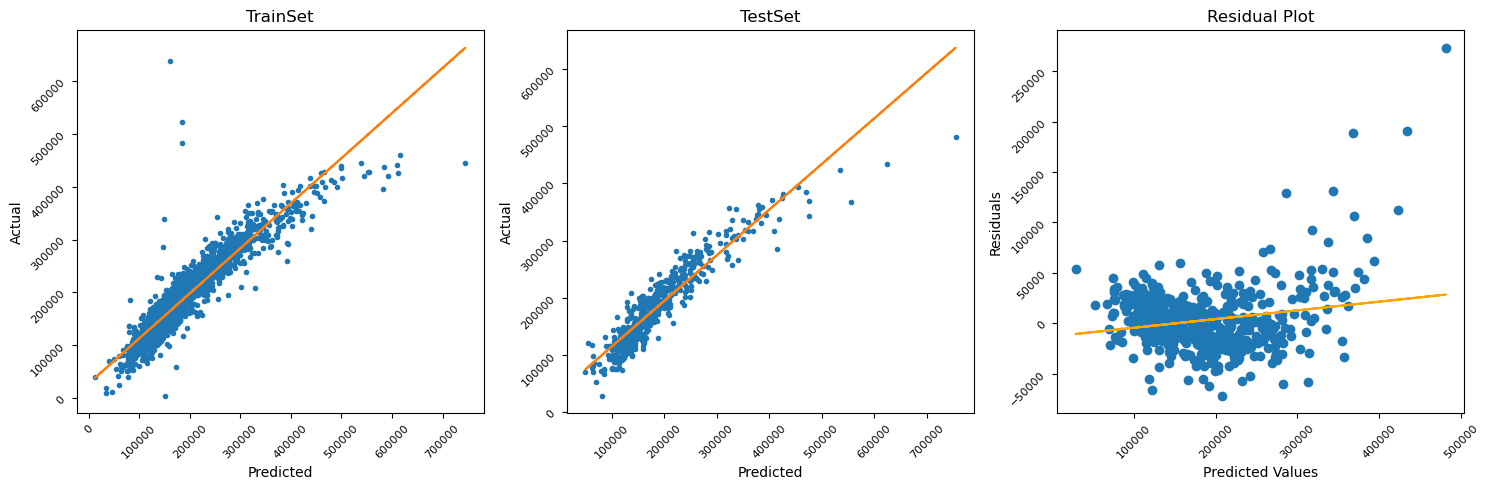

In [47]:
#ALPHA = 0.001
ridge_alpha001 = ridge_regression(X_train, SalePrice_train, X_test, SalePrice_test, 0.001, True)
MSR_list.append(ridge_alpha001["MSR"])
RMSE_list.append(ridge_alpha001["RMSE"])
Rsquared_list.append(ridge_alpha001["R^2"])

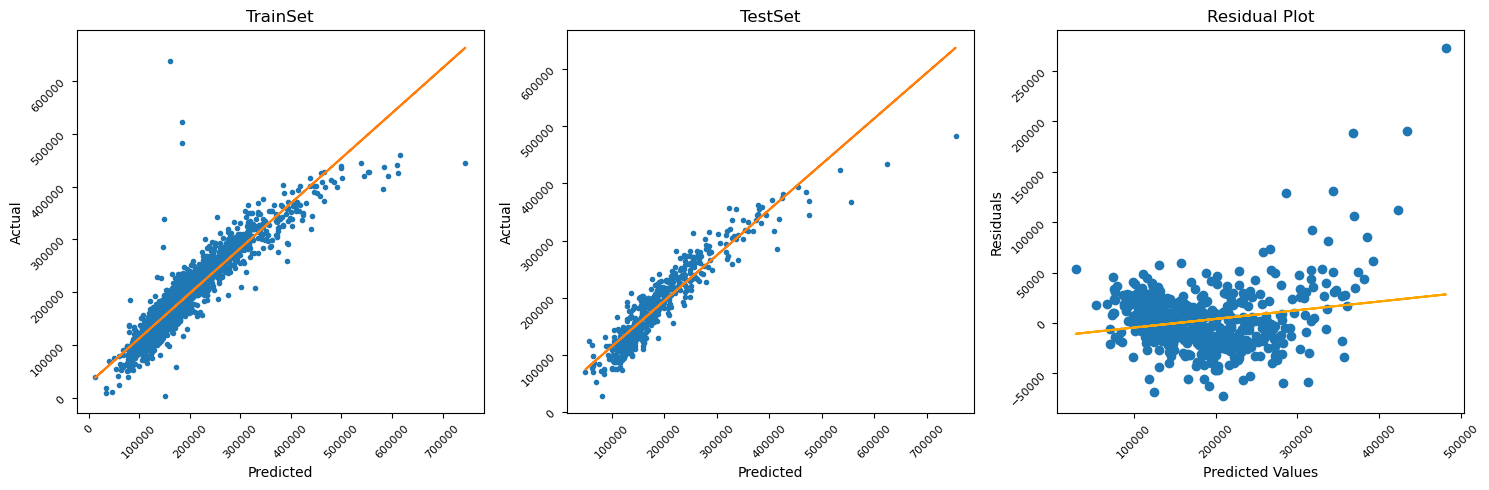

In [48]:
#ALPHA = 1.000 
ridge_alpha1 = ridge_regression(X_train, SalePrice_train, X_test, SalePrice_test, 1, True)
MSR_list.append(ridge_alpha1["MSR"])
RMSE_list.append(ridge_alpha1["RMSE"])
Rsquared_list.append(ridge_alpha1["R^2"])

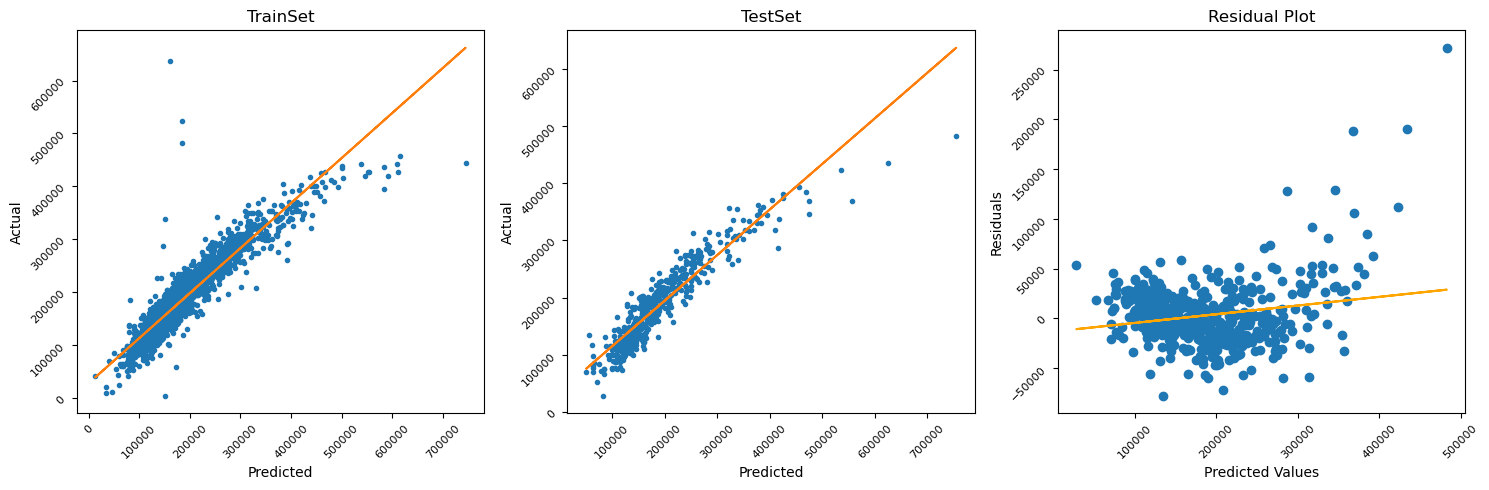

In [49]:
#ALPHA = 10 
ridge_alpha10 = ridge_regression(X_train, SalePrice_train, X_test, SalePrice_test, 10, True)
MSR_list.append(ridge_alpha10["MSR"])
RMSE_list.append(ridge_alpha10["RMSE"])
Rsquared_list.append(ridge_alpha10["R^2"])

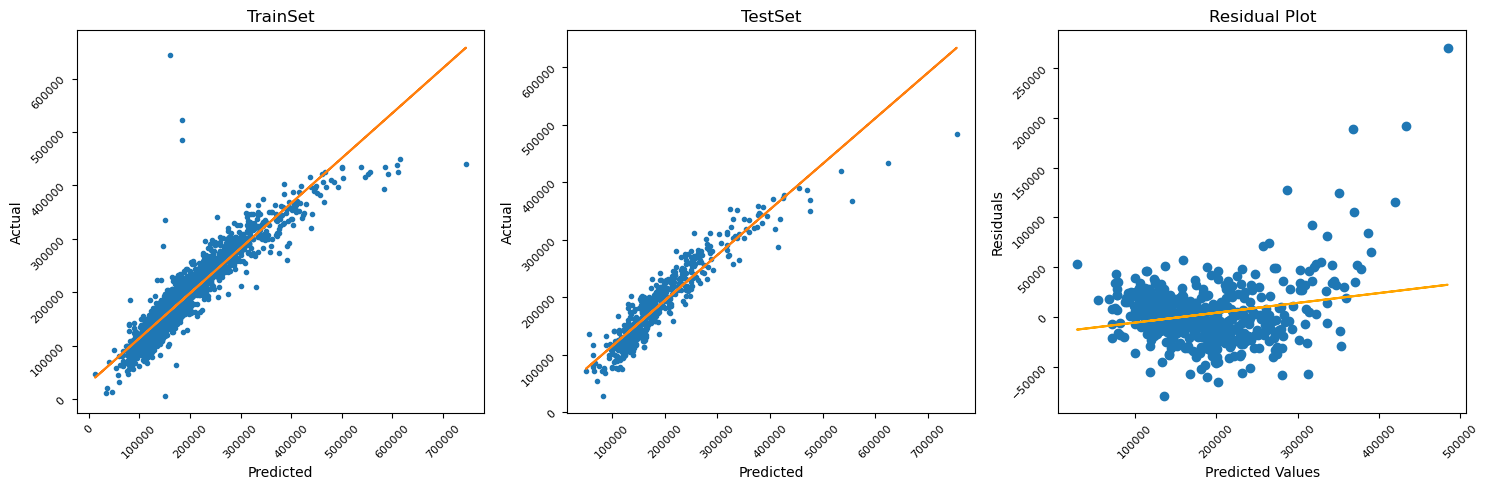

In [50]:
#ALPHA = 100
ridge_alpha100 = ridge_regression(X_train, SalePrice_train, X_test, SalePrice_test, 100, True)
MSR_list.append(ridge_alpha100["MSR"])
RMSE_list.append(ridge_alpha100["RMSE"])
Rsquared_list.append(ridge_alpha100["R^2"])

In [51]:
ridge_alpha1000000 = ridge_regression(X_train, SalePrice_train, X_test, SalePrice_test, 1000, False)
MSR_list.append(ridge_alpha1000000["MSR"])
RMSE_list.append(ridge_alpha1000000["RMSE"])
Rsquared_list.append(ridge_alpha1000000["R^2"])

In [52]:
ridge_res_data = { 
            "MSR" : MSR_list,
            "RMSE" : RMSE_list,
            "R^2" : Rsquared_list
            }
index = ["alpha=0.001", "alpha=1", "alpha=10", "alpha=100", "alpha=1000"]

ridge_res_df = pd.DataFrame(ridge_res_data, index = index)

ridge_res_df

MSR          RMSE       R^2
alpha=0.001  9.475480e+08  30782.267852  0.859195
alpha=1      9.481335e+08  30791.776601  0.859108
alpha=10     9.476300e+08  30783.598801  0.859183
alpha=100    9.354548e+08  30585.205156  0.860992
alpha=1000   1.034745e+09  32167.447022  0.846238

Alpha value does not seem to have a big impact. Even with an 'absurd' value like 1000. That said, the best R squared is obtained with alpha = 100. It is an improvement from the classic linear regression model. It indicate that with better features selection and regulazation, the predictions can be improved.

Looking at the graphic, the model seems to perform better on the test set than on the training set.

# 3.3 - Lasso

In [53]:
#RE-INITIALING RESULT LISTS
MSR_list = []
RMSE_list = []
Rsquared_list = []

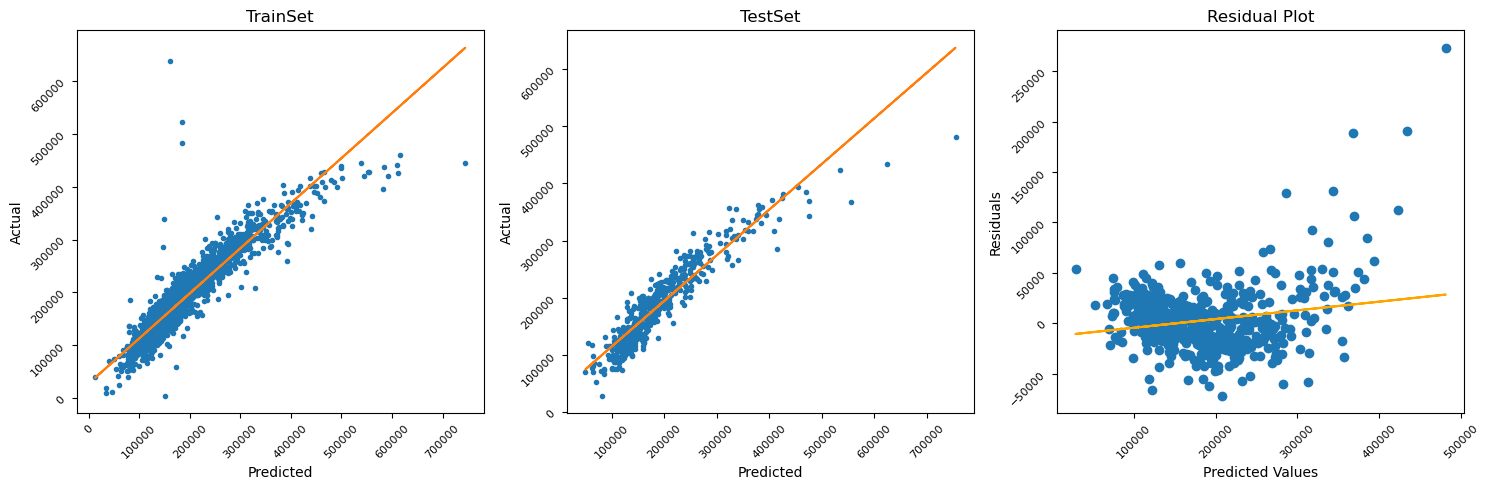

In [54]:
#ALPHA = 0.001
lasso_alpha001 = lasso_regression(X_train, SalePrice_train, X_test, SalePrice_test, 0.001, True)
MSR_list.append(lasso_alpha001["MSR"])
RMSE_list.append(lasso_alpha001["RMSE"])
Rsquared_list.append(lasso_alpha001["R^2"])

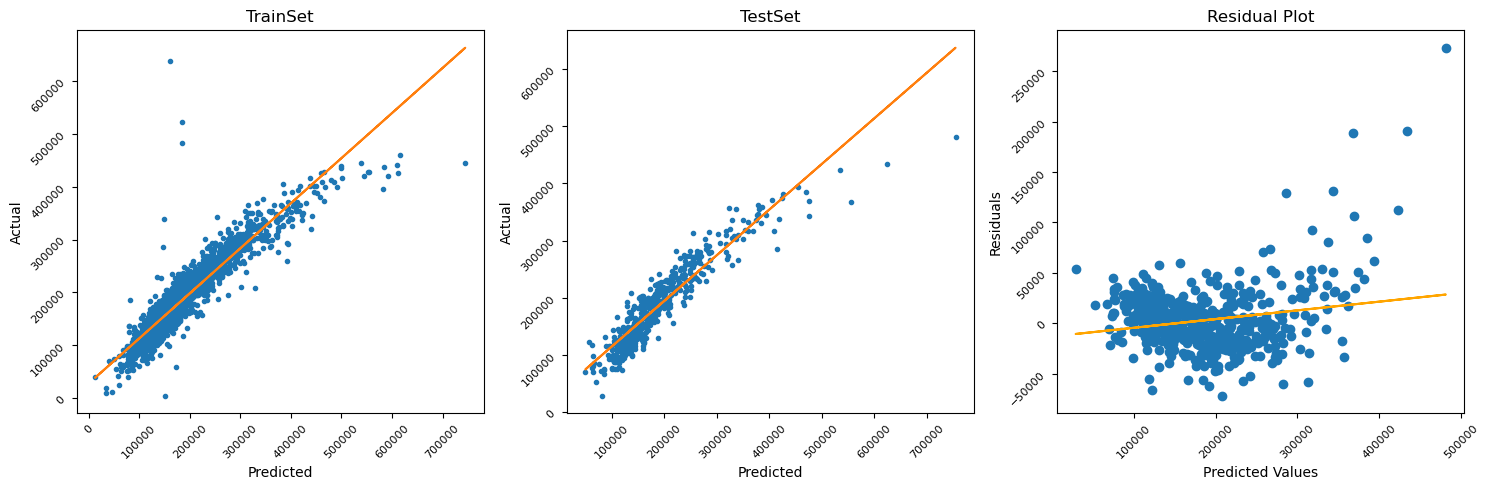

In [55]:
#ALPHA = 1
lasso_alpha1 = lasso_regression(X_train, SalePrice_train, X_test, SalePrice_test, 1, True)
MSR_list.append(lasso_alpha1["MSR"])
RMSE_list.append(lasso_alpha1["RMSE"])
Rsquared_list.append(lasso_alpha1["R^2"])

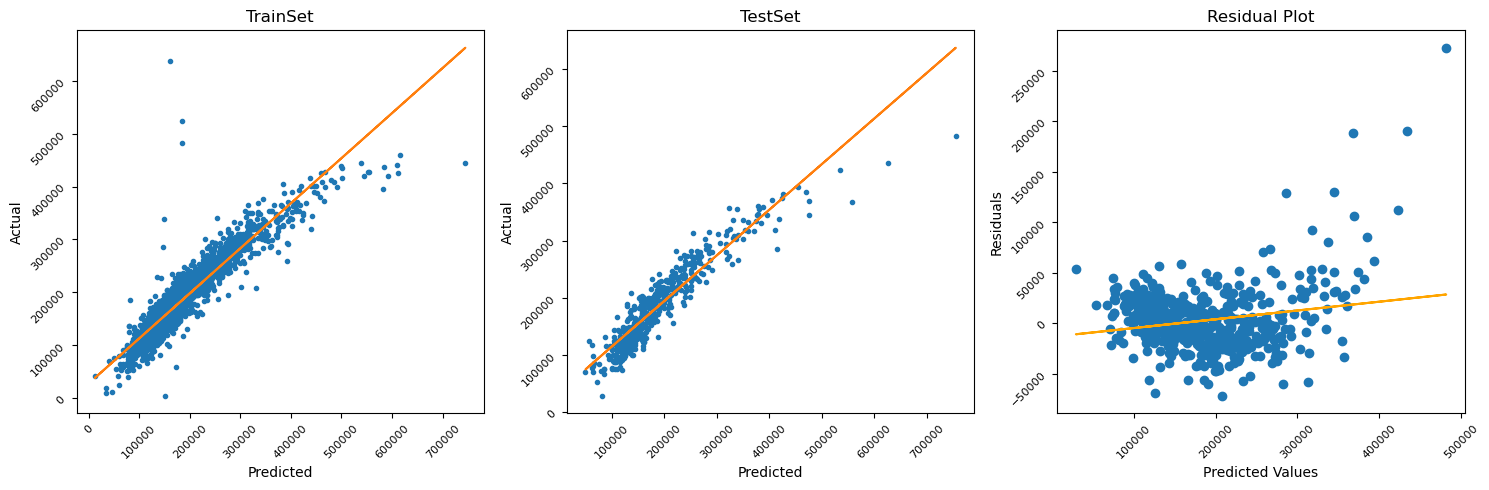

In [56]:
#ALPHA = 10
lasso_alpha10 = lasso_regression(X_train, SalePrice_train, X_test, SalePrice_test, 10, True)
MSR_list.append(lasso_alpha10["MSR"])
RMSE_list.append(lasso_alpha10["RMSE"])
Rsquared_list.append(lasso_alpha10["R^2"])

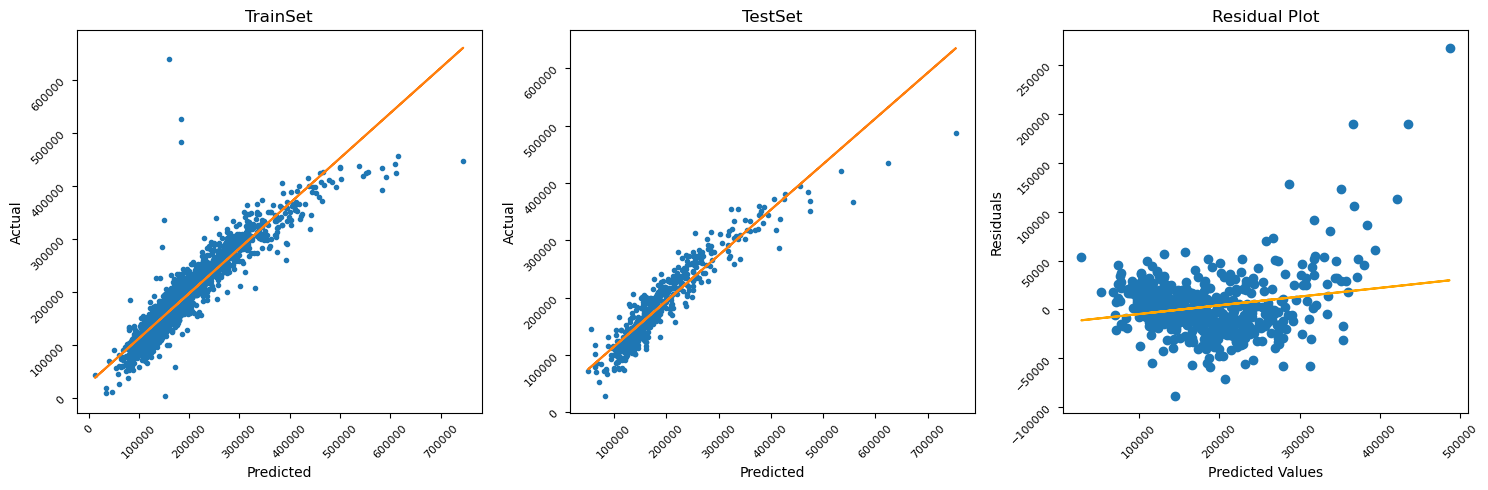

In [57]:
#ALPHA = 100
lasso_alpha100 = lasso_regression(X_train, SalePrice_train, X_test, SalePrice_test, 100, True)
MSR_list.append(lasso_alpha100["MSR"])
RMSE_list.append(lasso_alpha100["RMSE"])
Rsquared_list.append(lasso_alpha100["R^2"])

In [58]:
#ALPHA = 1000
lasso_alpha1000 = lasso_regression(X_train, SalePrice_train, X_test, SalePrice_test, 1000, False)
MSR_list.append(lasso_alpha1000["MSR"])
RMSE_list.append(lasso_alpha1000["RMSE"])
Rsquared_list.append(lasso_alpha1000["R^2"])

In [59]:
lasso_res_data = { 
            "MSR" : MSR_list,
            "RMSE" : RMSE_list,
            "R^2" : Rsquared_list
            }
index = ["alpha=0.001", "alpha=1", "alpha=10", "alpha=100", "alpha=1000"]

lasso_res_df = pd.DataFrame(ridge_res_data, index = index)

lasso_res_df

MSR          RMSE       R^2
alpha=0.001  9.475480e+08  30782.267852  0.859195
alpha=1      9.481335e+08  30791.776601  0.859108
alpha=10     9.476300e+08  30783.598801  0.859183
alpha=100    9.354548e+08  30585.205156  0.860992
alpha=1000   1.034745e+09  32167.447022  0.846238

these results are very similar to those with Ridge regulazation.

# 3.4 Ridge vs Lasso

In [60]:
#RIDGE VS LASSO
ridge_vs_lasso = lasso_res_df.join(ridge_res_df, lsuffix='_Lasso', rsuffix='_Ridge')

In [61]:
ridge_vs_lasso

MSR_Lasso    RMSE_Lasso  R^2_Lasso     MSR_Ridge  \
alpha=0.001  9.475480e+08  30782.267852   0.859195  9.475480e+08   
alpha=1      9.481335e+08  30791.776601   0.859108  9.481335e+08   
alpha=10     9.476300e+08  30783.598801   0.859183  9.476300e+08   
alpha=100    9.354548e+08  30585.205156   0.860992  9.354548e+08   
alpha=1000   1.034745e+09  32167.447022   0.846238  1.034745e+09   

               RMSE_Ridge  R^2_Ridge  
alpha=0.001  30782.267852   0.859195  
alpha=1      30791.776601   0.859108  
alpha=10     30783.598801   0.859183  
alpha=100    30585.205156   0.860992  
alpha=1000   32167.447022   0.846238

We do not see any difference between using Ridge or Lasso regulazation framework.

# 3.5 - Prices vs Log Prices

We will proceed using alpha = 0.001 with Ridge model

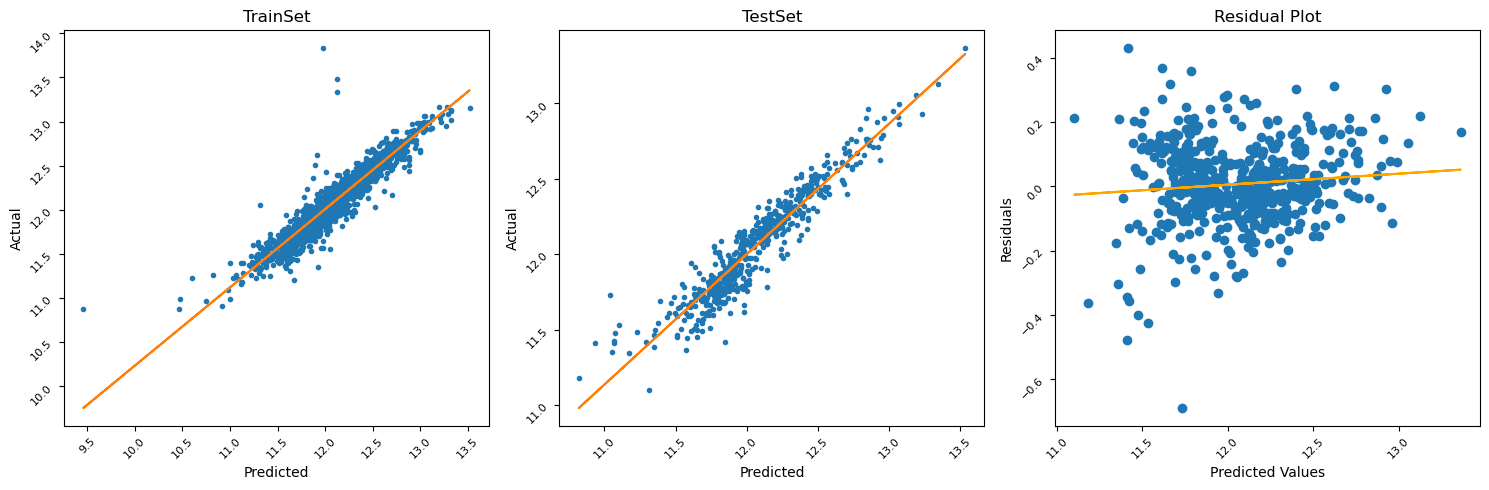

In [62]:
#APPLYING RIDGE MODEL USING LOG PRICES
logPrice_res_df = ridge_regression(X_train, LogSalePrice_train, X_test, LogSalePrice_test, 0.001, True)

In [63]:
#PRICE RESULTS
print('SalePrice')
ridge_res_df.iloc[0,:].astype(float)

SalePrice


MSR     9.475480e+08
RMSE    3.078227e+04
R^2     8.591949e-01
Name: alpha=0.001, dtype: float64

In [64]:
#LOG PRICE RESULTS
print('Log(SalePrice)')
print('MSR :', logPrice_res_df['MSR'])
print('RMSE :', logPrice_res_df['RMSE'])
print( 'R^2 :', logPrice_res_df['R^2'])

Log(SalePrice)
MSR : 0.01578630367016078
RMSE : 0.12564355801297883
R^2 : 0.8926875375242243


Log SalePrice seems to lead to a better model. Why?

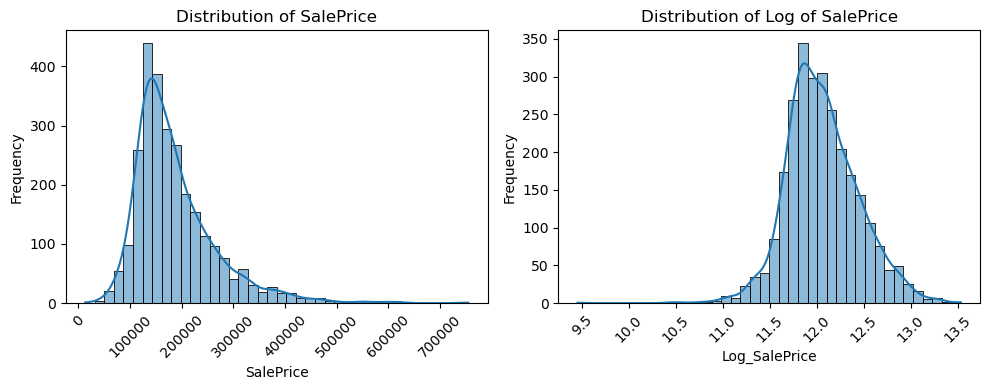

In [65]:
#PRICE AND LOG PRICE DISTRIBUTION
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()


data = df['SalePrice'].copy()  
data = pd.DataFrame(data)
sns.histplot(data=data, x='SalePrice', bins=40, kde=True, ax=axes[0])
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of SalePrice')
axes[0].tick_params(axis='x', rotation=45)

Log_data = Log_SalePrice.copy()  
Log_data = pd.DataFrame(Log_data)
sns.histplot(data=Log_data, x='Log_SalePrice', bins=40, kde=True, ax=axes[1])
axes[1].set_xlabel('Log_SalePrice')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Log of SalePrice')
axes[1].tick_params(axis='x', rotation=45)

#for i in range(num_features, len(axes)):
    #fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Applying the log function to SalePrice seems to have some 'normalizing effect' on the distribution. In a case of a linear regression,
It can lead to better model.

# 3.4 - Features Importance

Even though our model is not perfect, we can already try to see which features seem to contribute the most to the prediction. To do so, we will look at the absolute weights. We will use SalePrice (not Log of SalePrice)

In [66]:
#FUNCTION TO RETRIEVE WEIGHTS AND PLOT THEM
def plot_feature_importance(feature_names, weights, Top_importance_bool=False, top_features=0):
    
        feature_importance_df = pd.DataFrame({ 'Feature': feature_names, 'Weight': weights})
        
        feature_importance_df['Absolute Weight'] = np.abs(feature_importance_df['Weight'])
        feature_importance_df = feature_importance_df.sort_values(by='Absolute Weight', ascending=False)
        
        if Top_importance_bool :
            top_importance_features = feature_importance_df.iloc[:top_features,:]
            df_to_return = top_importance_features
        else :
            df_to_return = feature_importance_df
        
        plt.figure(figsize=(10, 6))
        plt.barh(df_to_return['Feature'], df_to_return['Weight'], color='b')
        plt.xlabel('Weight (Coefficient)')
        plt.ylabel('Feature')
        plt.yticks(fontsize=5)
        plt.tight_layout
        plt.title('Feature Importance from Weights')
        plt.gca().invert_yaxis()  # 
        plt.show()

        return df_to_return

In [67]:
feature_names = df.drop('SalePrice', axis=1).columns
weights_ridge = ridge_alpha001["Coefficients"]
weights_lasso = lasso_alpha001["Coefficients"]

# 3.4.1 - Ridge With alpha = 0.001

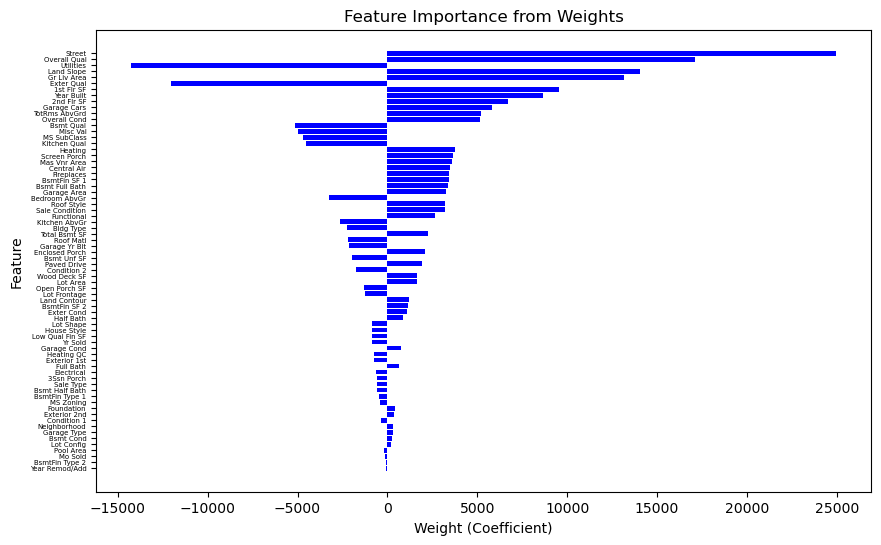

In [68]:
feature_importance_df = plot_feature_importance(feature_names, weights_ridge)

**Features Importance ranking according to Ridge:**

'Street' '1st Flr SF' 'Overall Qual' '2nd Flr SF' 'Utilities'
 'Land Slope' 'Exter Qual' 'Year Built' 'Garage Cars' 'BsmtFin SF 1'
 'TotRms AbvGrd' 'Overall Cond' 'Bsmt Qual' 'Misc Val' 'MS SubClass'
 'Kitchen Qual' 'Heating' 'Screen Porch' 'Mas Vnr Area' 'Central Air'
 'Fireplaces' 'Bsmt Full Bath' 'Garage Area' 'Bedroom AbvGr' 'Roof Style'
 'Sale Condition' 'Gr Liv Area' 'Functional' 'Kitchen AbvGr' 'Bldg Type'
 'Roof Matl' 'Garage Yr Blt' 'Enclosed Porch' 'BsmtFin SF 2' 'Paved Drive'
 'Condition 2' 'Wood Deck SF' 'Lot Area' 'Open Porch SF' 'Lot Frontage'
 'Land Contour' 'Exter Cond' 'Half Bath' 'Lot Shape' 'House Style'
 'Yr Sold' 'Garage Cond' 'Heating QC' 'Exterior 1st' 'Full Bath'
 'Electrical' '3Ssn Porch' 'Sale Type' 'Bsmt Half Bath' 'BsmtFin Type 1'
 'MS Zoning' 'Foundation' 'Exterior 2nd' 'Condition 1' 'Neighborhood'
 'Garage Type' 'Total Bsmt SF' 'Bsmt Cond' 'Lot Config' 'Pool Area'
 'Bsmt Unf SF' 'Mo Sold' 'BsmtFin Type 2' 'Year Remod/Add'
 'Low Qual Fin SF']

# 3.4.2 - Lasso With alpha = 0.001

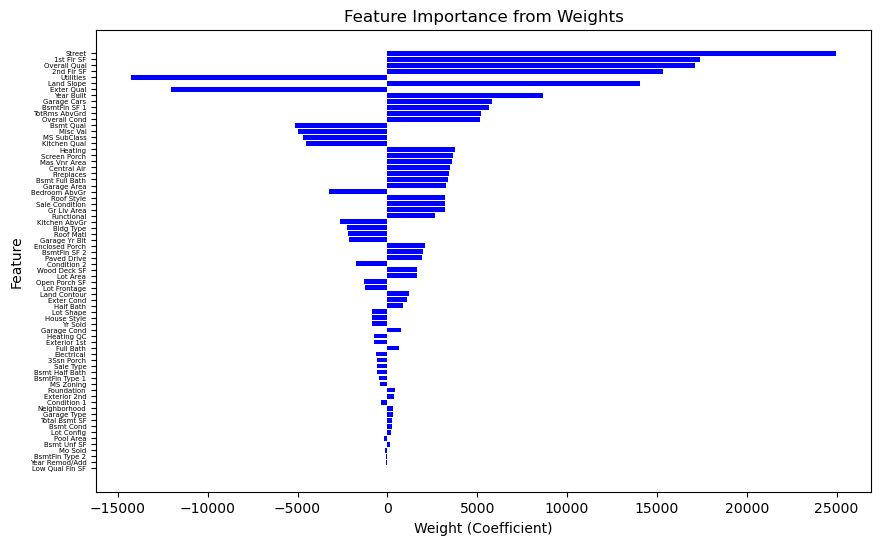

In [69]:
feature_importance_df = plot_feature_importance(feature_names, weights_lasso)

**Features Importance ranking according to Lasso:**

'Street' '1st Flr SF' 'Overall Qual' '2nd Flr SF' 'Utilities'
 'Land Slope' 'Exter Qual' 'Year Built' 'Garage Cars' 'BsmtFin SF 1'
 'TotRms AbvGrd' 'Overall Cond' 'Bsmt Qual' 'Misc Val' 'MS SubClass'
 'Kitchen Qual' 'Heating' 'Screen Porch' 'Mas Vnr Area' 'Central Air'
 'Fireplaces' 'Bsmt Full Bath' 'Garage Area' 'Bedroom AbvGr' 'Roof Style'
 'Sale Condition' 'Gr Liv Area' 'Functional' 'Kitchen AbvGr' 'Bldg Type'
 'Roof Matl' 'Garage Yr Blt' 'Enclosed Porch' 'BsmtFin SF 2' 'Paved Drive'
 'Condition 2' 'Wood Deck SF' 'Lot Area' 'Open Porch SF' 'Lot Frontage'
 'Land Contour' 'Exter Cond' 'Half Bath' 'Lot Shape' 'House Style'
 'Yr Sold' 'Garage Cond' 'Heating QC' 'Exterior 1st' 'Full Bath'
 'Electrical' '3Ssn Porch' 'Sale Type' 'Bsmt Half Bath' 'BsmtFin Type 1'
 'MS Zoning' 'Foundation' 'Exterior 2nd' 'Condition 1' 'Neighborhood'
 'Garage Type' 'Total Bsmt SF' 'Bsmt Cond' 'Lot Config' 'Pool Area'
 'Bsmt Unf SF' 'Mo Sold' 'BsmtFin Type 2' 'Year Remod/Add'
 'Low Qual Fin SF']

# 4 - MODEL IMPROVEMENTS

# 4.1 - One hot for categorical features

We had decided to not use one hot technique previously due to the large number of categorical features.
That choice has certainly introduced some noise into our model. In fact, with regular mapping, the model is certainly looking for some
order importance for the different values attributed to each category.

We will look at the results while using one hot. We will use **Lasso regression** for this part. Now with one hot encoding, the number of features increases drastically. So we should penalise more features in the model to avoid overfitting. We prefer Lasso to Ridge here as we know that Lasso is more likely to bring **useless features coeffs to 0**.

In [70]:
#ONE HOT MAPPING
one_hots = pd.get_dummies(df_scalled[non_numerical_columns], prefix=non_numerical_columns, prefix_sep='_').astype(int)

In [71]:
dropping_to_be_replaced = list(non_numerical_columns)+['SalePrice']

In [72]:
df_onehot = df_scalled.drop(dropping_to_be_replaced, axis = 1).join(one_hots)

In [73]:
df_onehot

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0       -0.878591      3.364678  2.671941     -0.165074     -0.545013   
1       -0.878591      0.490438  0.169812     -0.903807      0.392714   
2       -0.878591      0.537556  0.498288     -0.165074      0.392714   
3       -0.878591      1.102981  0.112437      0.573659     -0.545013   
4        0.085318      0.207726  0.444018     -0.903807     -0.545013   
...           ...           ...       ...           ...           ...   
2924    -0.878591      4.259933  1.210254     -0.903807      1.330441   
2925     0.567273     -1.535666 -0.287819     -0.165074      0.392714   
2926    -0.878591     -0.017285 -0.170089     -0.903807     -0.545013   
2928    -0.878591      0.349082 -0.030378     -0.903807     -0.545013   
2929     0.085318      0.207726 -0.077942      0.573659     -0.545013   

      Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
0      -0.450045       -1.230482      0.022270      0.377614     -0.303367   
1      -0.416201       -1.181655     -0.588861      0.004123      0.521393   
2      -0.517734       -1.328136      0.000444      0.997914     -0.303367   
3      -0.179289       -0.839867     -0.588861      1.308064     -0.303367   
4       0.802201        0.624941     -0.588861      0.709605     -0.303367   
...          ...             ...           ...           ...           ...   
2924   -0.450045        0.527287     -0.588861      1.655344     -0.303367   
2925    0.362223       -0.058636     -0.588861      0.770762     -0.303367   
2926    0.328378       -0.107463     -0.588861     -0.360630      1.552343   
2928    0.023778       -0.498078     -0.588861      1.321168      0.401116   
2929    0.666823        0.429634     -0.075947      0.637528     -0.303367   

      ...  Sale Type_New  Sale Type_Oth  Sale Type_VWD  Sale Type_WD   \
0     ...              0              0              0              1   
1     ...              0              0              0              1   
2     ...              0              0              0              1   
3     ...              0              0              0              1   
4     ...              0              0              0              1   
...   ...            ...            ...            ...            ...   
2924  ...              0              0              0              1   
2925  ...              0              0              0              1   
2926  ...              0              0              0              1   
2928  ...              0              0              0              1   
2929  ...              0              0              0              1   

      Sale Condition_Abnorml  Sale Condition_AdjLand  Sale Condition_Alloca  \
0                          0                       0                      0   
1                          0                       0                      0   
2                          0                       0                      0   
3                          0                       0                      0   
4                          0                       0                      0   
...                      ...                     ...                    ...   
2924                       1                       0                      0   
2925                       0                       0                      0   
2926                       0                       0                      0   
2928                       0                       0                      0   
2929                       0                       0                      0   

      Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
0                         0                      1                       0  
1                         0                      1                       0  
2                         0                      1                       0  
3                         0                      1        

In [74]:
#TRAINING AND TEST SEPARATION
X_train_onehot, X_test_onehot, LogSalePrice_train_onehot, LogSalePrice_test_onehot = train_test_split(df_onehot, Log_SalePrice, test_size=0.20, random_state=2002)

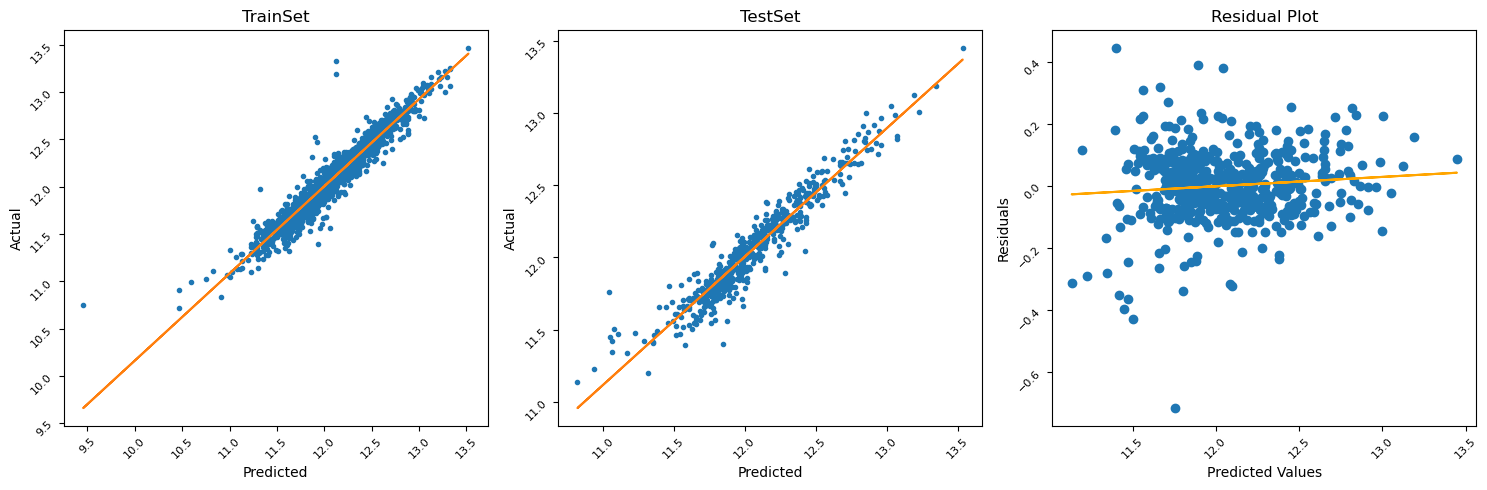

In [75]:
#PREDICTION FOR LOG SALEPRICE / ALPHA = 0.001
#Using Log SalePrice as it yield better R squared
one_hot_lasso_logprice = lasso_regression(X_train_onehot, LogSalePrice_train_onehot, X_test_onehot, LogSalePrice_test_onehot, 0.0001, True)

In [76]:
#RIDGE COEFFICIENTS AND METRICS
one_hot_lasso_logprice

{'Training Set RSS': 23.404850351206036,
 'Intercept': 11.981033290680024,
 'Coefficients': array([-1.84810185e-02,  5.49766698e-03,  1.36908322e-02,  7.96217358e-02,
         4.46488646e-02,  4.83809410e-02,  6.65742495e-03, -7.47569202e-04,
         2.44840274e-02,  9.44690001e-03, -0.00000000e+00,  1.59928418e-02,
         7.06255042e-02,  6.50803525e-02,  1.86795699e-03,  2.60061180e-02,
         1.12184425e-02, -7.03228176e-04,  1.50697483e-02,  6.64548655e-03,
         1.20539066e-04, -1.22474807e-02,  9.17935528e-03,  1.68730089e-02,
         5.93290959e-03,  2.16304397e-02,  9.96091985e-03,  5.92828361e-03,
         3.84349504e-03,  1.19322332e-02,  9.38633092e-04,  1.38623582e-02,
         3.76850020e-03, -1.86232133e-02, -9.19716672e-04, -1.87516745e-03,
        -2.50874984e-01,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         8.66499745e-03, -3.78762770e-02, -9.41185587e-02,  1.11434642e-16,
         0.00000000e+00,  1.64633903e-02, -0.00000000e+00, -2.67674068e-0

We see an improvement when using one hut encoding for the catecorigal features. R squared for goes  0.89 to 0.9151 for log of SalePrice

# 4.1.1 Lasso Vs Ridge : More features

Previously, we did not see any difference in results when using Ridge or Lasso Regression. With one hot encoding, there are now many more features. Let's see if the results differ now.

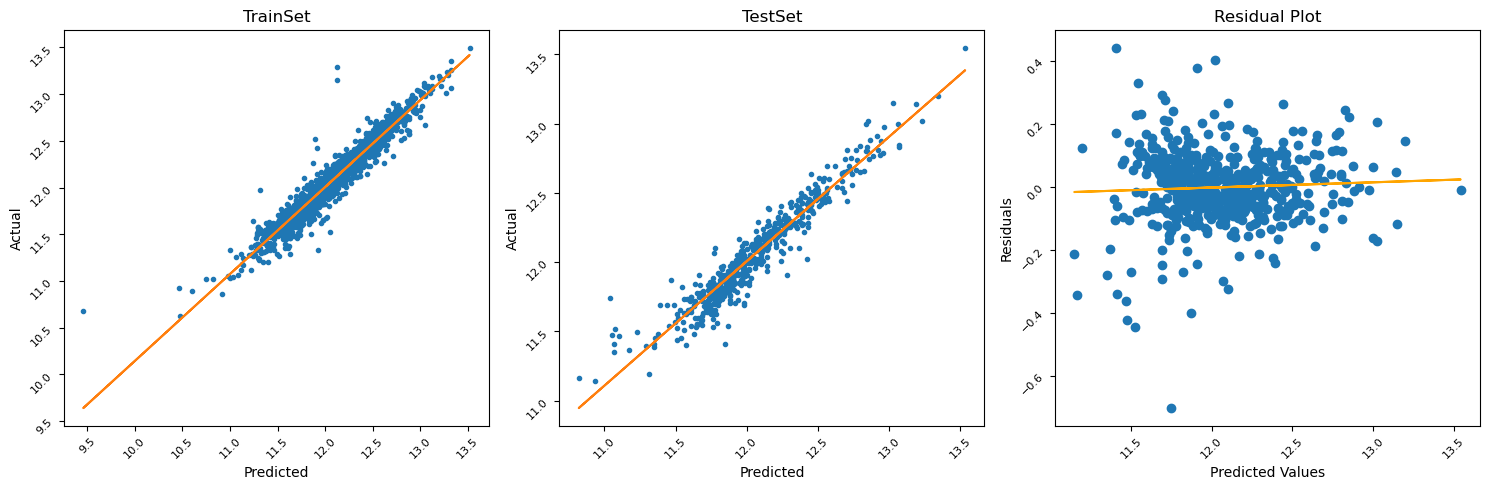

In [77]:
one_hot_ridge_logprice = ridge_regression(X_train_onehot, LogSalePrice_train_onehot, X_test_onehot, LogSalePrice_test_onehot, 0.001, True)

In [78]:
#RIDGE COEFFICIENTS AND METRICS
one_hot_ridge_logprice

{'Training Set RSS': 22.542791853777537,
 'Intercept': 11.678161502648647,
 'Coefficients': array([-1.91429430e-02,  6.74400877e-03,  1.66987187e-02,  7.47082780e-02,
         4.48614987e-02,  4.74134057e-02,  6.00266949e-03, -7.98520265e-04,
         2.16317038e-02,  9.28524485e-03, -4.91182561e-03,  2.29667412e-02,
         4.27704619e-02,  3.35504458e-02,  1.14575611e-04,  6.23301459e-02,
         1.04460089e-02, -8.02117682e-04,  1.56214601e-02,  6.51760180e-03,
         1.61618368e-03, -1.35059852e-02,  7.07544716e-03,  1.53296349e-02,
         7.43843291e-03,  2.02978095e-02,  1.14236976e-02,  5.86092948e-03,
         3.40404238e-03,  1.11361041e-02,  1.74604065e-03,  1.38186357e-02,
         5.68901984e-03, -2.09432154e-02, -6.49037591e-04, -1.25767346e-03,
        -2.59183701e-01,  5.71162125e-02,  1.23971457e-02,  9.27952242e-02,
         7.22914336e-02,  2.45836854e-02, -6.79940311e-02,  6.79940311e-02,
        -7.33289657e-03,  9.22248527e-03,  5.80235633e-03, -7.69194506e-0

Best R Squared for Ridge is obtained with alpha = 0.001: R_Squared = 0.9133

Best R Squared for Lasso is obtained with alpha = 0.0001: R_Squared = 0.9151

Here, we see a performance difference between Lasso and Ridge. Lasso yielding a higher R^2.

We know that Lasso is better at ignoring useless features. As the number of features has increased, Ridge method, which prefers to attribute small but non-zero weights to less important features certainly captures some unnecessary noise.

# 4.2 - Using only 'most important' Features

We saw previously that with one hot encoding, we can have better results than our initial model.

Based on the weights from a Ridge regression, on the one-hot data frame vs SalePrice, we will extract feature importances and try to see how it performs when using only the most important features.

In [79]:
one_hot_model = ridge_regression(X_train_onehot, SalePrice_train, X_test_onehot, SalePrice_test, 0.001, False)

In [80]:
print('R^2 for ridge with alpha = 0.001 :', one_hot_model['R^2'])

R^2 for ridge with alpha = 0.001 : 0.9052618858401258


In [81]:
feature_names_onehot = df_onehot.columns
weights_onehot = one_hot_model["Coefficients"] 

# 4.2.1 - Top 50

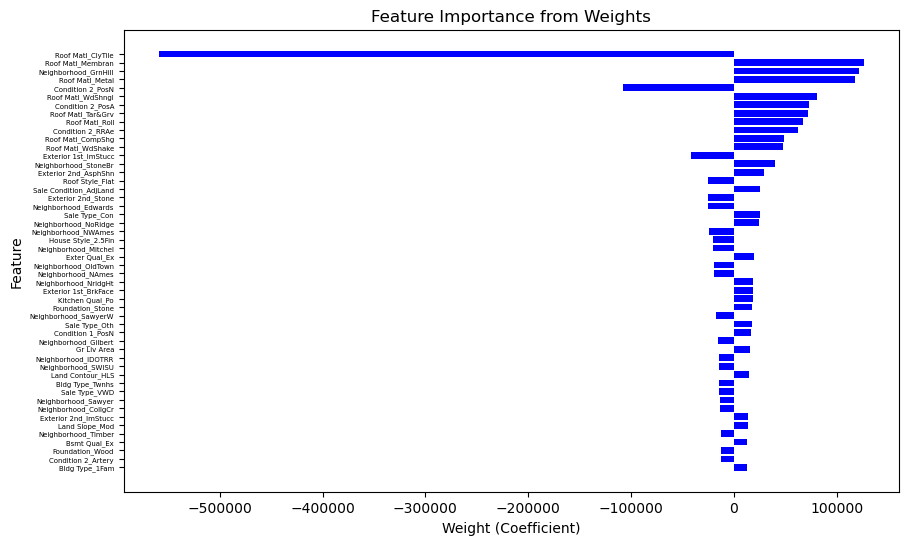

In [82]:
#TOP 50 MOST IMPORTANT FEATURES
most_important_onehot = plot_feature_importance(feature_names_onehot, weights_onehot, True, top_features=50)

We see that the importance order is significantly different from what we had with our first ordinal mapping for categorical variables. Now, the most imporant features are all categorical.

When looking at the features vs saleprice gaphs, we can see that these features are not necessarely those who displayed the strongest relation with SalePrice. One can fear that the perceived improvement with one hot encoding is a result of overfitting. Maybe if applied on a very different dataset, the model will performed more poorly.

That said, we won't investigate the matter futher. We will still use theses weights as ranking for importance here for simplicity.

In [83]:
print(most_important_onehot.Feature)

127         Roof Matl_ClyTile
129         Roof Matl_Membran
73       Neighborhood_GrnHill
130           Roof Matl_Metal
104          Condition 2_PosN
134         Roof Matl_WdShngl
103          Condition 2_PosA
132         Roof Matl_Tar&Grv
131            Roof Matl_Roll
105          Condition 2_RRAe
128         Roof Matl_CompShg
133         Roof Matl_WdShake
141      Exterior 1st_ImStucc
88       Neighborhood_StoneBr
150      Exterior 2nd_AsphShn
121           Roof Style_Flat
255    Sale Condition_AdjLand
160        Exterior 2nd_Stone
70       Neighborhood_Edwards
246             Sale Type_Con
81       Neighborhood_NoRidge
80        Neighborhood_NWAmes
116        House Style_2.5Fin
77       Neighborhood_Mitchel
165             Exter Qual_Ex
83       Neighborhood_OldTown
78         Neighborhood_NAmes
82       Neighborhood_NridgHt
137      Exterior 1st_BrkFace
220           Kitchen Qual_Po
177          Foundation_Stone
86       Neighborhood_SawyerW
251             Sale Type_Oth
95        

In [84]:
#TRAINING AND TEST SEPARATION
X_train_onehot_mostimp, X_test_onehot_mostimp, SalePrice_train_onehot, SalePrice_test_onehot = \
                                        train_test_split(df_onehot[list(most_important_onehot.Feature)], SalePrice, test_size=0.20, random_state=2002)

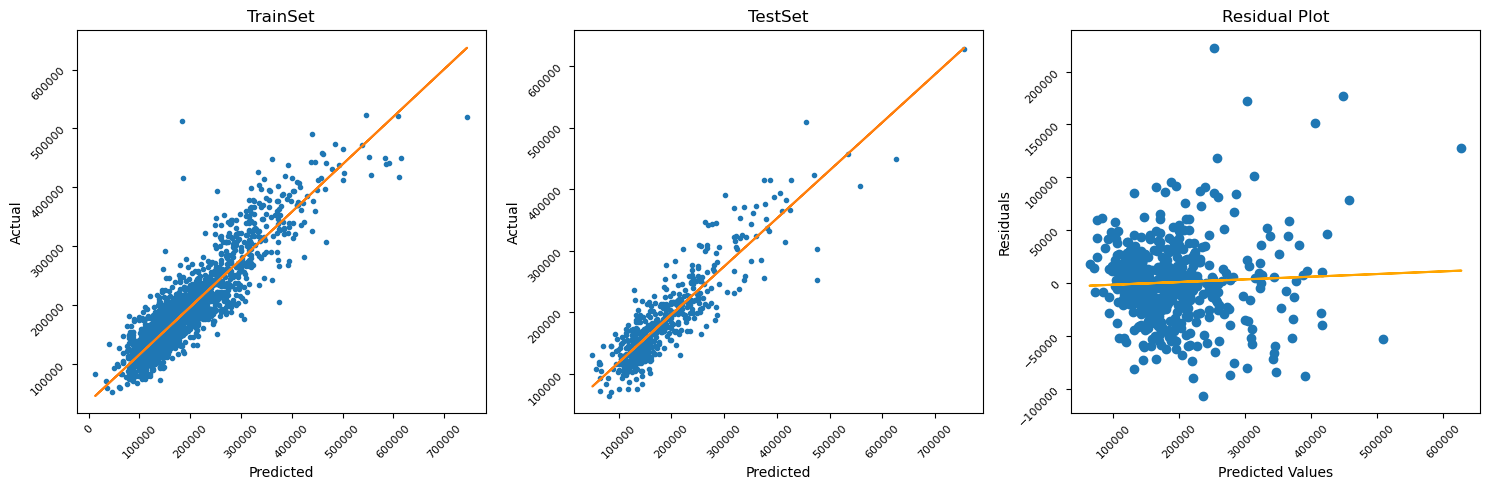

In [85]:
#APPLYING RIDGE REGRESSION
res_most_important_feat = ridge_regression(X_train_onehot_mostimp, SalePrice_train_onehot, X_test_onehot_mostimp,\
                                           SalePrice_test_onehot, 0.001, True)

In [86]:
res_most_important_feat

{'Training Set RSS': 2605079438627.7397,
 'Intercept': 148396.77832077304,
 'Coefficients': array([-365521.80613196,  105465.42318   ,  156259.28040236,
          70713.96587405,  -78267.02043828,   92542.30111097,
          81912.59206626,   57415.36046715,  -10179.83837686,
         -36883.68624459,   26395.5446342 ,   23169.04924213,
          -3878.39799179,   67656.4139329 ,  -14590.85390596,
         -18011.91433825,   -5400.88584581,  -34043.26279476,
         -46560.01901955,   63434.20264366,   56833.17222141,
         -17801.1007293 ,  -44964.54074369,  -15244.13858855,
          63766.41479378,  -58961.9693345 ,  -29775.87009969,
          52388.13547148,   15619.05078198,  -62871.78663088,
          -3929.45319038,   -7290.1106167 ,    9615.16009987,
          10823.49908941,  -10194.99352529,   35671.07843853,
         -57754.56026931,  -52101.22107385,   16316.78080369,
         -21521.18125046,   -3704.98149751,  -26306.60666021,
           7004.80551535,   10119.7350983

# 4.2.2 - Top 100

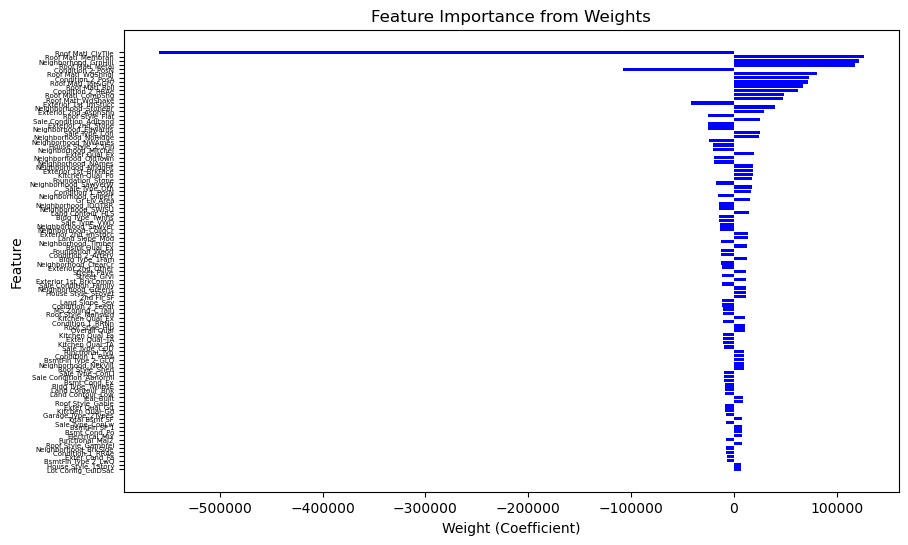

In [87]:
#TOP 100 MOST IMPORTANT FEATURES
most_important_onehot = plot_feature_importance(feature_names_onehot, weights_onehot, True, top_features=100)

In [88]:
print(most_important_onehot.Feature)

127       Roof Matl_ClyTile
129       Roof Matl_Membran
73     Neighborhood_GrnHill
130         Roof Matl_Metal
104        Condition 2_PosN
               ...         
96         Condition 1_RRAe
170           Exter Cond_Fa
198      BsmtFin Type 2_LwQ
115      House Style_1Story
56       Lot Config_CulDSac
Name: Feature, Length: 100, dtype: object


In [89]:
#TRAINING AND TEST SEPARATION
X_train_onehot_mostimp, X_test_onehot_mostimp, SalePrice_train_onehot, SalePrice_test_onehot = \
                                        train_test_split(df_onehot[list(most_important_onehot.Feature)], SalePrice, test_size=0.20, random_state=2002)

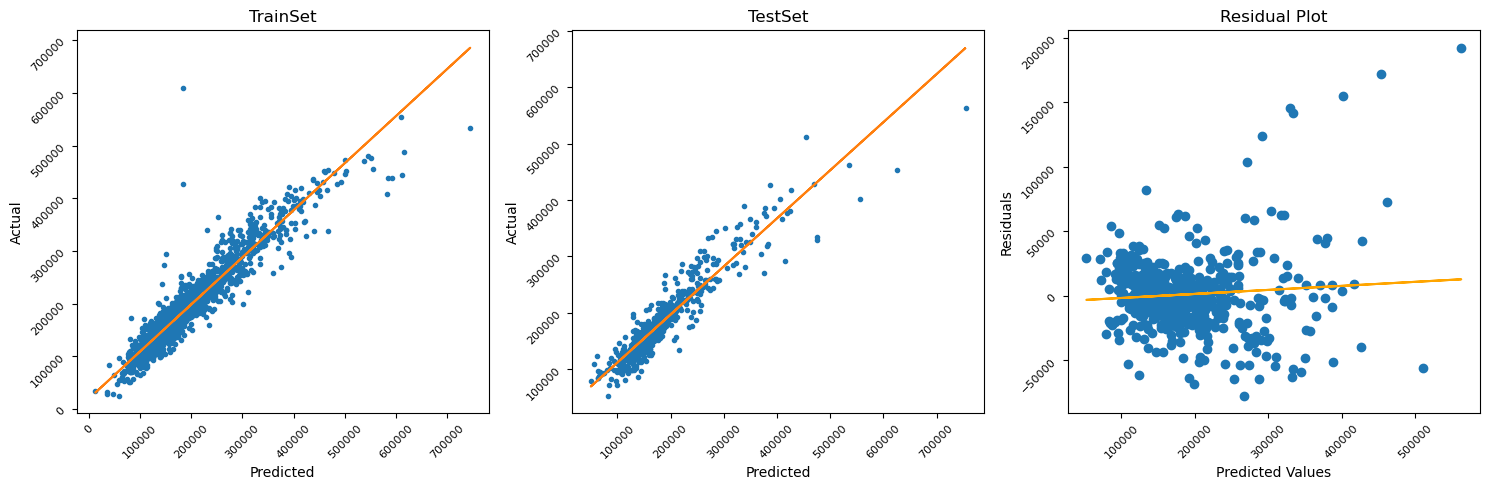

In [90]:
#APPLYING RIDGE REGRESSION
res_most_important_feat = ridge_regression(X_train_onehot_mostimp, SalePrice_train_onehot, X_test_onehot_mostimp,\
                                           SalePrice_test_onehot, 0.001, True)

In [91]:
res_most_important_feat

{'Training Set RSS': 1428091471610.538,
 'Intercept': 114568.95414555381,
 'Coefficients': array([-4.66348702e+05,  9.31665378e+04,  1.17815117e+05,  6.46574233e+04,
        -1.05447588e+05,  7.92216007e+04,  6.66191372e+04,  6.76307557e+04,
         5.26053448e+04,  4.40844203e+03,  5.41797171e+04,  5.48873224e+04,
        -4.37252417e+04,  3.71721201e+04,  1.57689275e+04,  1.00227227e+03,
         5.47511364e+03, -3.20519554e+04, -3.23301270e+04,  3.48606667e+04,
         2.47691800e+04, -2.83917848e+04, -1.16538415e+04, -2.39975188e+04,
         3.17523055e+04, -2.82956324e+04, -2.63782769e+04,  2.18375823e+04,
         1.10756976e+04, -4.41785986e+03,  1.71702620e+04, -2.40105201e+04,
         2.36857066e+04,  1.32979853e+04, -2.02165521e+04,  2.82115435e+04,
        -2.36898229e+04, -2.64363909e+04,  1.09195025e+04, -2.21667699e+04,
         2.64811692e+03, -2.20780988e+04, -1.95702254e+04,  1.09122731e+04,
         1.37819406e+04, -1.53676156e+04,  2.05695870e+04, -1.02156134e+04

# 4.2.3 - Top 150

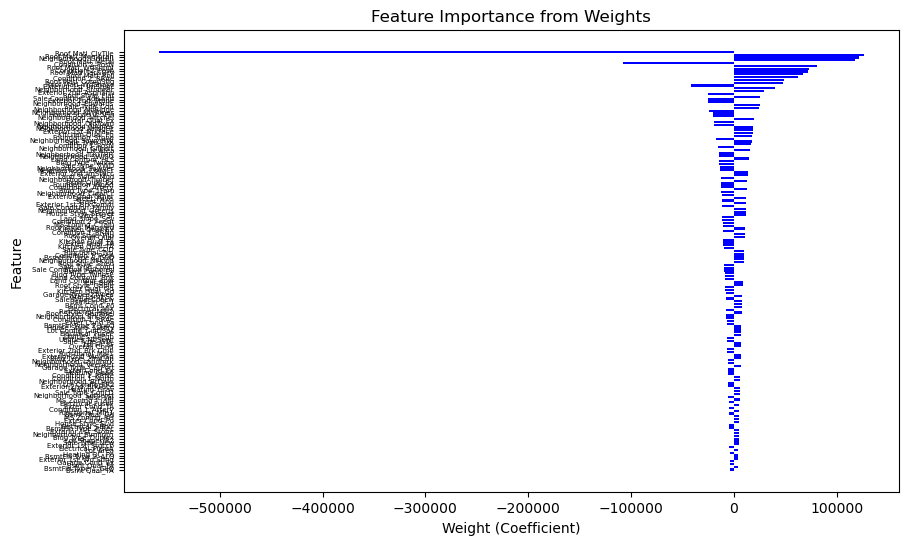

In [92]:
#TOP 150 MOST IMPORTANT FEATURES
most_important_onehot = plot_feature_importance(feature_names_onehot, weights_onehot, True, top_features=150)

In [93]:
print(most_important_onehot.Feature)

127       Roof Matl_ClyTile
129       Roof Matl_Membran
73     Neighborhood_GrnHill
130         Roof Matl_Metal
104        Condition 2_PosN
               ...         
147    Exterior 1st_Wd Sdng
236          Garage Cond_Ex
180            Bsmt Qual_Fa
191      BsmtFin Type 1_GLQ
183            Bsmt Qual_TA
Name: Feature, Length: 150, dtype: object


In [94]:
#TRAINING AND TEST SEPARATION
X_train_onehot_mostimp, X_test_onehot_mostimp, SalePrice_train_onehot, SalePrice_test_onehot = \
                                        train_test_split(df_onehot[list(most_important_onehot.Feature)], SalePrice, test_size=0.20, random_state=2002)

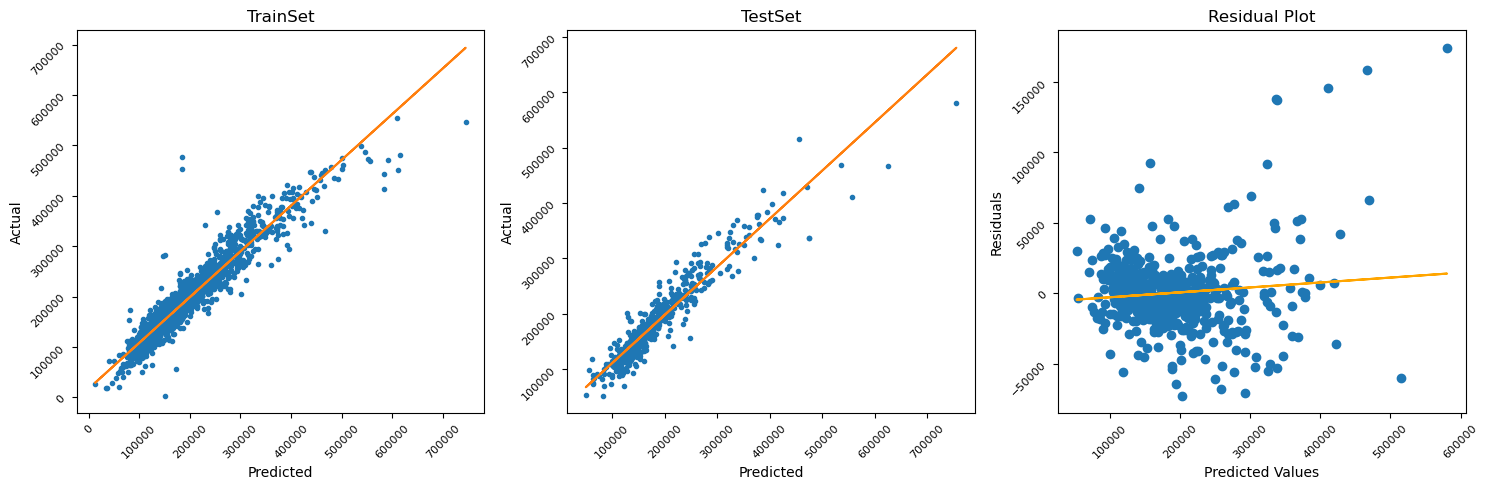

In [95]:
#APPLYING RIDGE REGRESSION
res_most_important_feat = ridge_regression(X_train_onehot_mostimp, SalePrice_train_onehot, X_test_onehot_mostimp,\
                                           SalePrice_test_onehot, 0.001, True)

In [96]:
res_most_important_feat

{'Training Set RSS': 1236089018723.3816,
 'Intercept': 114408.32628312593,
 'Coefficients': array([-5.30751088e+05,  1.13649367e+05,  1.07926098e+05,  1.11306498e+05,
        -1.12291854e+05,  7.81640891e+04,  7.53534761e+04,  7.19713317e+04,
         5.84883978e+04,  6.39779457e+04,  4.72731390e+04,  4.98982659e+04,
        -3.98771579e+04,  3.96750777e+04,  1.88035023e+04, -1.49671281e+04,
         2.49248332e+04, -2.86822284e+04, -2.65980562e+04,  3.16500598e+04,
         2.77430354e+04, -2.33991208e+04, -1.69342520e+04, -2.10637755e+04,
         2.34691799e+04, -2.21650677e+04, -2.01640026e+04,  2.31411940e+04,
         1.74419452e+04,  1.35129258e+04,  1.08656200e+04, -1.69936437e+04,
         2.10372207e+04,  1.83472005e+04, -1.45179558e+04,  2.10998289e+04,
        -1.89700358e+04, -1.92391485e+04,  1.16022160e+04, -1.25196247e+04,
         4.40706817e+03, -1.69647416e+04, -1.45290558e+04,  1.43434510e+04,
         1.45477653e+04, -1.31830142e+04,  1.43482338e+04, -1.22616865e+0

We can see that the more feature we had, the 'better' metrics get. 
A no point we reach an optimal R^2 (the one for ridge alpha = 0.001 above) while using less features. This is not a very robust features selection method.

# 5 - CONCLUSION


### Residuals Display Some Trends, Not Great
Despite achieving a reasonable fit with the current model, the residuals display noticeable patterns, suggesting that the model has not fully captured the underlying data distribution. Ideally, residuals should be randomly scattered around zero, which would indicate that the model's predictions are unbiased. The presence of trends in the residuals may point to issues such as non-linearity, unaccounted interactions between features, or model misspecification. Future work should explore alternative models, such as non-linear techniques or interaction terms, to better capture the complexity of the data.

### Try to Combine the Different Improvements into One Final Model
Throughout the experimentation process, several individual model improvements were identified. Moving forward, combining these strategies into a single, cohesive model is crucial to achieving the best performance. 

### The Dataset Contains Some Outliers That Induce Too Much Noise and Might Have to Be Dropped
An analysis of the dataset revealed the presence of extreme values, which significantly distort the model's ability to learn meaningful patterns. Outliers introduce noise that can skew the results and lead to poor generalization on unseen data. In the future, careful consideration should be given to identifying and possibly removing or treating these outliers. Techniques such as Z-scores, IQR (interquartile range), or domain-specific methods can help detect outliers. Alternatively, robust models that are less sensitive to outliers, such as decision trees or regularized regression techniques, may be considered.

### Could Adopt a More Robust Approach to Missing Data Instead of Replacing by Mean, Median, and Mode
Currently, missing data is handled by simple imputation methods like replacing missing values with the mean, median, or mode. While these methods are straightforward, they may introduce bias and oversimplify the structure of the data. A more robust approach would involve using techniques such as multiple imputation, regression imputation, or models that handle missing data natively, like k-Nearest Neighbors (KNN) or matrix factorization. These methods can better account for the relationships between features and provide more accurate imputed values, improving model performance.

### Many Features Displayed Strong Linear Correlation, Which Introduced Multicollinearity Problems
During the feature analysis phase, several features showed strong linear correlations with each other, indicating multicollinearity. This can lead to instability in model coefficients, making it harder to interpret the model and reducing predictive power. Regularization techniques such as Lasso or Ridge regression can help mitigate multicollinearity by shrinking or penalizing the coefficients of correlated features. We try to implemeted these. But, additionally, applying dimensionality reduction techniques like Principal Component Analysis (PCA) or more aggressive feature selection methods would help in removing redundant information, leading to a more stable model.

### Select the Most Important Features More Strongly for Better Predictions
Feature selection is critical for improving both the interpretability and performance of the model. While some feature importance analysis has been conducted, future iterations should focus more rigorously on selecting the most predictive features. This could involve using methods such as Recursive Feature Elimination (RFE), feature importance from tree-based models. By focusing on a smaller subset of the most important features, the model can achieve better generalization and reduce the risk of overfitting, leading to more accurate predictions on new data.